RMSE = 0.12978934066195322


<IPython.core.display.Javascript object>


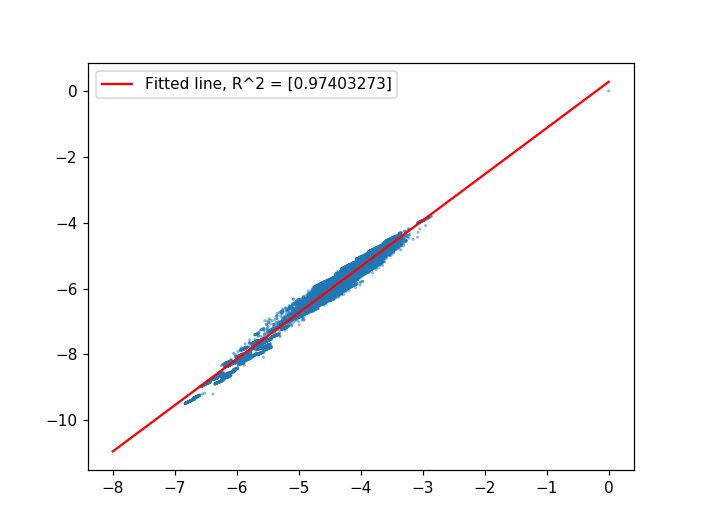

In [7]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

wb97x_energies = np.empty([])
xtb_energies = np.empty([])

wb97x_ref_eng = {"1": -0.4993212, "6": -37.8338334, "7": -54.5732825, "8": -75.0424519, 
                 "9": -99.6949007, "16": -398.0814169, "17": -460.1167006}
xtb_ref_eng = {"1": -0.39348276, "6": -1.79329637, "7": -2.60582416, "8": -3.76760695, 
               "9": -4.61933996, "16": -3.14645687, "17": -4.48252514}

def hartree2kcal(x):
    return 627.509 * x

db = anidataloader('./ani1x-20191001_wb97x_dz_xtb_tmp1.h5')
for i, data in enumerate(db):
    species = data['species']
    wb97x_data_energies = data['wb97x_dz_energies']
    xtb_data_energies = data['xtb_energies']
    wb97x_ref_data = 0.0
    xtb_ref_data = 0.0
    for at in species:
        wb97x_ref_data += wb97x_ref_eng.get(str(at), 0.0)
        xtb_ref_data += xtb_ref_eng.get(str(at), 0.0)
    # print(wb97x_ref_data, xtb_ref_data)
    wb97x_data_energies = wb97x_data_energies - wb97x_ref_data
    xtb_data_energies = xtb_data_energies - xtb_ref_data
    wb97x_energies = np.concatenate((wb97x_energies, wb97x_data_energies), axis=None)
    xtb_energies = np.concatenate((xtb_energies, xtb_data_energies), axis=None)

A = np.vstack([wb97x_energies, np.ones(len(wb97x_energies))]).T
model, resid = np.linalg.lstsq(A, xtb_energies, rcond=None)[:2]
m, c = model
r2 = 1 - resid / (xtb_energies.size * xtb_energies.var())
rmse = np.linalg.norm(m*wb97x_energies + c - xtb_energies) / np.sqrt(len(wb97x_energies))
print('RMSE =', rmse)
x2 = np.linspace(start = -8.0, stop = 0.0, num = 801)

plt.figure(0)
plt.clf()
plt.figure(0)
plt.scatter(wb97x_energies, xtb_energies, edgecolors='none', s=4, alpha=0.5)
plt.plot(x2, m*x2 + c, 'r', label=('Fitted line, R^2 = %s' % r2))
plt.legend()
plt.show()


/F1H1O1S1 [ 17  39  54  55 156 168 207 208 219 242 259 260 265 267 268 275 276 282
 283 287 297 298 301 305 315 320 321 323 325 342 344 346 348 349 351 352
 358 359 360 361 371 403]
wb97x_data_energies [-573.64355779 -573.62505539 -573.63167282 -573.62854547 -573.65017404
 -573.63030227 -573.65448251 -573.66261669 -573.65150862 -573.62051057
 -573.3799632  -573.50119371 -573.4648808  -573.38926966 -573.50579259
 -573.50395168 -573.4946566  -573.55081089 -573.29054866 -573.35719117
 -573.22886508 -573.57501102 -573.48413508 -573.13036645 -573.36135723
 -572.60329426 -573.38074543 -573.39421066 -573.39556953 -573.44636575
 -573.5526547  -573.46453796 -573.34753257 -573.52218989 -573.53342357
 -573.51486974 -573.5098879  -573.58964863 -572.84811219 -573.62429851
 -573.65004755 -573.61277025] [ 16.89938087  28.50979963  24.35730275  26.31974616  12.74762571
  25.21733458  10.04401699   4.93974771  11.91016475  31.3617201
 182.30735908 106.23411796 129.02079768 176.4674679  103.34828125
 10

  52.59991218 124.51771717  23.86343999 126.16381572]
xtb_data_energies [-9.3948238  -9.38409695 -9.31452021 -9.32517605 -9.39279827 -9.38498218
 -8.56919708 -9.36574591 -9.21652768 -9.33453645 -9.33465503 -9.32291102
 -9.37293599 -9.34333584 -9.16450067 -9.39628002 -9.38076578 -9.39071413
 -9.37259086 -9.33305532 -9.31102208 -8.57253015 -9.11470508 -9.10755157
 -9.37561293 -9.3725057  -9.38503892 -9.34696986 -9.38977614 -9.40315055
 -9.35302665 -9.22664679 -9.40023096 -9.37856437 -9.26591231 -9.34784739
 -9.28834813 -9.36921583 -9.18910388 -9.38542518 -9.43163692 -9.29528586
 -9.36045396 -9.33802912 -9.41533334 -9.30040071 -9.36933646 -9.44209647
 -9.31090807 -9.32017822 -9.05641881 -9.37155358 -9.22990134 -9.18574158
 -9.18393027 -9.38210801 -9.32810081 -9.32791149 -9.11943619 -9.37864246
 -9.3557737  -9.40771683 -9.27973091 -9.41181034 -9.10087216 -8.56449494
 -9.36420641 -9.35354393 -9.41662738 -9.21353687 -9.34540165 -9.37445958
 -9.30807248 -9.18200737 -9.28014793 -9.2847126  -9.

 -672.71512256 -672.71557412 -672.71604601] [7.38622646e-01 1.05217258e+00 1.37743810e+00 2.06050066e+01
 1.55035950e+00 1.41682057e+00 3.76913281e-01 1.25496027e+00
 5.82862864e+00 1.37755859e+00 2.15252530e-01 3.64633243e+00
 1.03282208e+00 1.12981803e+00 4.32910301e-01 3.94428375e+00
 2.67212910e+00 1.02290236e+01 1.03393152e+00 2.03903402e-01
 9.49147523e-01 9.60878176e-01 3.04424069e-01 6.12801406e+01
 9.62198455e-01 2.85071064e-01 6.36469703e+00 3.49562046e-01
 1.71217952e+01 1.04128216e+00 6.74082404e+00 4.03098729e+00
 1.09421380e+00 1.48810559e+00 4.16422377e+00 4.96771892e+00
 3.22980137e-01 7.89205519e-01 2.07989992e+00 9.25120831e-01
 4.47093699e+00 4.05703394e+00 9.77852922e-01 1.09684369e+00
 9.41740407e-01 1.23721557e-01 2.80737562e+01 2.30441460e+01
 8.15190479e+00 6.15552946e+00 9.42044749e-01 9.86624871e-01
 1.20603377e+01 3.57201410e+01 2.02630939e+00 3.23136575e+00
 1.33580037e+00 3.78172503e+00 1.32678269e+01 1.37363389e+01
 0.00000000e+00 5.57293880e-01 6.76808429

<IPython.core.display.Javascript object>


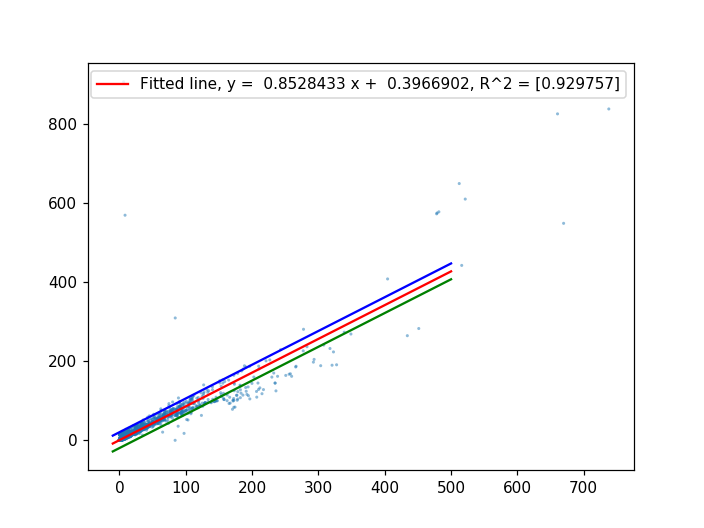

In [100]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

wb97x_energies = np.empty([])
xtb_energies = np.empty([])

wb97x_ref_eng = {"1": -0.4993212, "6": -37.8338334, "7": -54.5732825, "8": -75.0424519, 
                 "9": -99.6949007, "16": -398.0814169, "17": -460.1167006}
xtb_ref_eng = {"1": -0.39348276, "6": -1.79329637, "7": -2.60582416, "8": -3.76760695, 
               "9": -4.61933996, "16": -3.14645687, "17": -4.48252514}

db = anidataloader('./ani2x-20191001_wb97x_dz_xtb_F.h5')
for i, data in enumerate(db):
    species = data['species']
    wb97x_data_energies = data['wb97x_dz_energies']
    xtb_data_energies = data['xtb_energies']
    wb97x_ref_data = 0.0
    xtb_ref_data = 0.0
#    for at in species:
#        wb97x_ref_data += wb97x_ref_eng.get(str(at), 0.0)
#        xtb_ref_data += xtb_ref_eng.get(str(at), 0.0)
#    wb97x_data_energies = wb97x_data_energies - wb97x_ref_data
#    xtb_data_energies = xtb_data_energies - xtb_ref_data
    if wb97x_data_energies.size > 0:
        wb97x_ref_data = np.amin(wb97x_data_energies)
        xtb_ref_data = np.amin(xtb_data_energies)
    wb97x_data_energies = (wb97x_data_energies - wb97x_ref_data) * 627.509
    xtb_data_energies = (xtb_data_energies - xtb_ref_data) * 627.509
    fitted_wb97x_data_energies = wb97x_data_energies # * 1.1226124 - 0.0242954
    xtb_fit_diff = xtb_data_energies - fitted_wb97x_data_energies
    index_list = np.argwhere(abs(xtb_fit_diff) > 10.).reshape(-1)
    if index_list.size:
        print(data['path'], index_list)
        print('wb97x_data_energies', data['wb97x_dz_energies'][index_list], wb97x_data_energies[index_list])
        print('xtb_data_energies', data['xtb_energies'][index_list], xtb_data_energies[index_list])
    wb97x_energies = np.concatenate((wb97x_energies, wb97x_data_energies), axis=None)
    xtb_energies = np.concatenate((xtb_energies, xtb_data_energies), axis=None)

xtb_diff = xtb_energies - wb97x_energies
# low_eng_index = np.argwhere(wb97x_energies < 400.0).reshape(-1)
low_eng_index = np.argwhere(abs(xtb_diff) < 100.0).reshape(-1)
wb97x_for_fit = wb97x_energies[low_eng_index]
xtb_for_fit = xtb_energies[low_eng_index]
A = np.vstack([wb97x_for_fit, np.ones(len(wb97x_for_fit))]).T
model, resid = np.linalg.lstsq(A, xtb_for_fit, rcond=None)[:2]
m, c = model
r2 = 1 - resid / (xtb_for_fit.size * xtb_for_fit.var())
rmse = np.linalg.norm(m*wb97x_for_fit + c - xtb_for_fit) / np.sqrt(len(wb97x_for_fit))
print('RMSE =', rmse)
x2 = np.linspace(start = -10., stop = 500.0, num = 511)

plt.figure(1)
plt.clf()
plt.figure(1)
plt.scatter(wb97x_energies[0:3733], xtb_energies[0:3733], edgecolors='none', s=4, alpha=0.5)
plt.plot(x2, m*x2 + c, 'r', label=('Fitted line, y = %10.7f x + %10.7f, R^2 = %s' % (m, c, r2)))
plt.plot(x2, m*x2 + c + 20., 'b')
plt.plot(x2, m*x2 + c - 20., 'g')
# plt.plot(x2, x2, 'c')
plt.legend()
plt.show()
    

/Cl1F2H1 [252]
wb97x_data_energies [-659.75868025] [0.24714295]
xtb_data_energies [-10.69343632] [3.4212515]
/Cl2F1H1 [412 441]
wb97x_data_energies [-1020.23667752 -1020.25591498] [0.19094558 0.17170812]
xtb_data_energies [-11.87554826 -11.34769556] [2.10232474 2.63017744]
/Cl3H1 [ 55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 110 111 112 113 114 115 116 117 118 120 121 122 123 124 125 126 127 128
 129 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 156 157 158 160 162 163 164 165 166 167 168
 169 170 171 172 173 174 176 177 178 179 180]
wb97x_data_energies [-1380.78196963 -1381.07333592 -1381.06542853 -1381.06096942
 -1381.08465692 -1380.94483906 -1380.78244568 -1381.04770726
 -1380.94653213 -1380.72991549 -1381.02542    -1380.90686151
 -1381.05407335 -1381.08157953 -

<IPython.core.display.Javascript object>


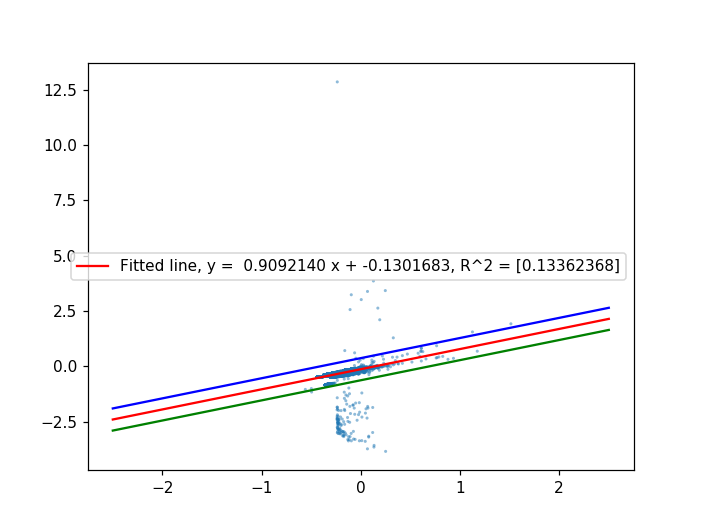

In [76]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

wb97x_energies = np.empty([])
xtb_energies = np.empty([])

wb97x_ref_eng = {"1": -0.4993212, "6": -37.8338334, "7": -54.5732825, "8": -75.0424519, 
                 "9": -99.6949007, "16": -398.0814169, "17": -460.1167006}
xtb_ref_eng = {"1": -0.39348276, "6": -1.79329637, "7": -2.60582416, "8": -3.76760695, 
               "9": -4.61933996, "16": -3.14645687, "17": -4.48252514}

db = anidataloader('./ani2x-20191001_wb97x_dz_xtb_Cl.h5')
for i, data in enumerate(db):
    species = data['species']
    wb97x_data_energies = data['wb97x_dz_energies']
    xtb_data_energies = data['xtb_energies']
    wb97x_ref_data = 0.0
    xtb_ref_data = 0.0
    for at in species:
        wb97x_ref_data += wb97x_ref_eng.get(str(at), 0.0)
        xtb_ref_data += xtb_ref_eng.get(str(at), 0.0)
    # print(wb97x_ref_data, xtb_ref_data)
    # if wb97x_data_energies.size > 0:
    #     wb97x_ref_data = np.amin(wb97x_data_energies)
    #     xtb_ref_data = np.amin(xtb_data_energies)
    wb97x_data_energies = (wb97x_data_energies - wb97x_ref_data) # * 627.509
    xtb_data_energies = (xtb_data_energies - xtb_ref_data) #  * 627.509
    fitted_wb97x_data_energies = wb97x_data_energies # * 0.909214 - 0.1301683
    xtb_fit_diff = xtb_data_energies - fitted_wb97x_data_energies
    index_list = np.argwhere(abs(xtb_fit_diff) > 1.0).reshape(-1)
    if index_list.size:
        print(data['path'], index_list)
        print('wb97x_data_energies', data['wb97x_dz_energies'][index_list], wb97x_data_energies[index_list])
        print('xtb_data_energies', data['xtb_energies'][index_list], xtb_data_energies[index_list])
    wb97x_energies = np.concatenate((wb97x_energies, wb97x_data_energies), axis=None)
    xtb_energies = np.concatenate((xtb_energies, xtb_data_energies), axis=None)

A = np.vstack([wb97x_energies, np.ones(len(wb97x_energies))]).T
model, resid = np.linalg.lstsq(A, xtb_energies, rcond=None)[:2]
m, c = model
r2 = 1 - resid / (xtb_energies.size * xtb_energies.var())
rmse = np.linalg.norm(m*wb97x_energies + c - xtb_energies) / np.sqrt(len(wb97x_energies))
print('RMSE =', rmse)
x2 = np.linspace(start = -2.5, stop = 2.5, num = 51)

plt.figure(2)
plt.clf()
plt.figure(2)
plt.scatter(wb97x_energies, xtb_energies, edgecolors='none', s=4, alpha=0.5)
plt.plot(x2, m*x2 + c, 'r', label=('Fitted line, y = %10.7f x + %10.7f, R^2 = %s' % (m, c, r2)))
plt.plot(x2, m*x2 + c + 0.5, 'b')
plt.plot(x2, m*x2 + c - 0.5, 'g')
# plt.plot(x2, x2, 'c')
plt.legend()
plt.show()
    

/C8H15N5O2 [2]
wb97x_data_energies [-737.09456632] [419.95030919]
xtb_data_energies [-46.84480803] [313.34261564]
RMSE = 11.045782031754097


<IPython.core.display.Javascript object>


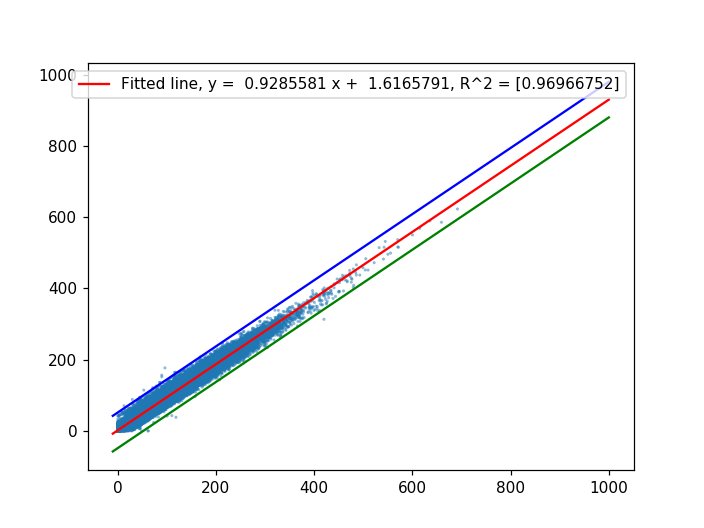

In [69]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

wb97x_energies = np.empty([])
xtb_energies = np.empty([])

wb97x_ref_eng = {"1": -0.4993212, "6": -37.8338334, "7": -54.5732825, "8": -75.0424519, 
                 "9": -99.6949007, "16": -398.0814169, "17": -460.1167006}
xtb_ref_eng = {"1": -0.39348276, "6": -1.79329637, "7": -2.60582416, "8": -3.76760695, 
               "9": -4.61933996, "16": -3.14645687, "17": -4.48252514}

db = anidataloader('./ani1x-20191001_wb97x_dz_xtb_C8.h5')
for i, data in enumerate(db):
    species = data['species']
    wb97x_data_energies = data['wb97x_dz_energies']
    xtb_data_energies = data['xtb_energies']
    wb97x_ref_data = 0.0
    xtb_ref_data = 0.0
    # for at in species:
    #     wb97x_ref_data += wb97x_ref_eng.get(str(at), 0.0)
    #     xtb_ref_data += xtb_ref_eng.get(str(at), 0.0)
    # print(wb97x_ref_data, xtb_ref_data)
    if wb97x_data_energies.size > 0:
        wb97x_ref_data = np.amin(wb97x_data_energies)
        xtb_ref_data = np.amin(xtb_data_energies)
    wb97x_data_energies = (wb97x_data_energies - wb97x_ref_data) * 627.509
    xtb_data_energies = (xtb_data_energies - xtb_ref_data) * 627.509
    fitted_wb97x_data_energies = wb97x_data_energies # * 0.909214 - 0.1301683
    xtb_fit_diff = xtb_data_energies - fitted_wb97x_data_energies
    index_list = np.argwhere(abs(xtb_fit_diff) > 100.0).reshape(-1)
    if index_list.size:
        print(data['path'], index_list)
        print('wb97x_data_energies', data['wb97x_dz_energies'][index_list], wb97x_data_energies[index_list])
        print('xtb_data_energies', data['xtb_energies'][index_list], xtb_data_energies[index_list])
    wb97x_energies = np.concatenate((wb97x_energies, wb97x_data_energies), axis=None)
    xtb_energies = np.concatenate((xtb_energies, xtb_data_energies), axis=None)

A = np.vstack([wb97x_energies, np.ones(len(wb97x_energies))]).T
model, resid = np.linalg.lstsq(A, xtb_energies, rcond=None)[:2]
m, c = model
r2 = 1 - resid / (xtb_energies.size * xtb_energies.var())
rmse = np.linalg.norm(m*wb97x_energies + c - xtb_energies) / np.sqrt(len(wb97x_energies))
print('RMSE =', rmse)
x2 = np.linspace(start = -10., stop = 1000.0, num = 1011)

plt.figure(3)
plt.scatter(wb97x_energies, xtb_energies, edgecolors='none', s=4, alpha=0.5)
# plt.ylim(-10, 2.0)
plt.plot(x2, m*x2 + c, 'r', label=('Fitted line, y = %10.7f x + %10.7f, R^2 = %s' % (m, c, r2)))
plt.plot(x2, m*x2 + c + 50.0, 'b')
plt.plot(x2, m*x2 + c - 50.0, 'g')
# plt.plot(x2, x2, 'c')
plt.legend()
plt.show()
    

RMSE = 0.5280259111680492


<IPython.core.display.Javascript object>


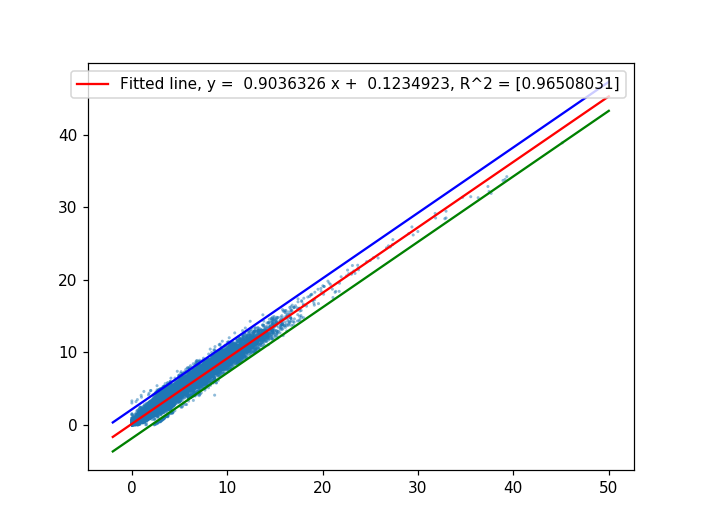

RMSE = 0.43629397246754625


<IPython.core.display.Javascript object>


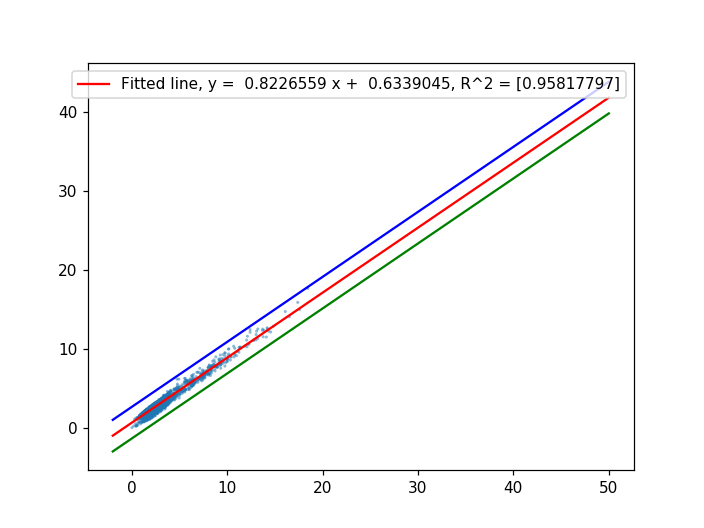

In [163]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

wb97x_energies = np.empty([])
xtb_energies = np.empty([])

wb97x_ref_eng = {"1": -0.4993212, "6": -37.8338334, "7": -54.5732825, "8": -75.0424519, 
                 "9": -99.6949007, "16": -398.0814169, "17": -460.1167006}
xtb_ref_eng = {"1": -0.39348276, "6": -1.79329637, "7": -2.60582416, "8": -3.76760695, 
               "9": -4.61933996, "16": -3.14645687, "17": -4.48252514}

db = anidataloader('./ani1x-20191001_wb97x_dz_xtb_C9.h5')
for i, data in enumerate(db):
    species = data['species']
    n_atom = len(species)
    wb97x_data_energies = data['wb97x_dz_energies']
    xtb_data_energies = data['xtb_energies']
    wb97x_ref_data = 0.0
    xtb_ref_data = 0.0
    # for at in species:
    #     wb97x_ref_data += wb97x_ref_eng.get(str(at), 0.0)
    #     xtb_ref_data += xtb_ref_eng.get(str(at), 0.0)
    # print(wb97x_ref_data, xtb_ref_data)
    if wb97x_data_energies.size > 0:
        wb97x_ref_data = np.amin(wb97x_data_energies)
        xtb_ref_data = np.amin(xtb_data_energies)
    wb97x_data_energies = (wb97x_data_energies - wb97x_ref_data) * 627.509 / float(n_atom)
    xtb_data_energies = (xtb_data_energies - xtb_ref_data) * 627.509 / float(n_atom)
    fitted_wb97x_data_energies = wb97x_data_energies # * 0.909214 - 0.1301683
    xtb_fit_diff = xtb_data_energies - fitted_wb97x_data_energies
    index_list = np.argwhere(abs(xtb_fit_diff) > 60.0).reshape(-1)
    if index_list.size:
        print(data['path'], index_list)
        print('wb97x_data_energies', data['wb97x_dz_energies'][index_list], wb97x_data_energies[index_list])
        print('xtb_data_energies', data['xtb_energies'][index_list], xtb_data_energies[index_list])
    wb97x_energies = np.concatenate((wb97x_energies, wb97x_data_energies), axis=None)
    xtb_energies = np.concatenate((xtb_energies, xtb_data_energies), axis=None)

A = np.vstack([wb97x_energies, np.ones(len(wb97x_energies))]).T
model, resid = np.linalg.lstsq(A, xtb_energies, rcond=None)[:2]
m, c = model
r2 = 1 - resid / (xtb_energies.size * xtb_energies.var())
rmse = np.linalg.norm(m*wb97x_energies + c - xtb_energies) / np.sqrt(len(wb97x_energies))
print('RMSE =', rmse)
x2 = np.linspace(start = -2., stop = 50.0, num = 521)

plt.figure(3)
plt.scatter(wb97x_energies, xtb_energies, edgecolors='none', s=4, alpha=0.5)
# plt.ylim(-10, 2.0)
plt.plot(x2, m*x2 + c, 'r', label=('Fitted line, y = %10.7f x + %10.7f, R^2 = %s' % (m, c, r2)))
plt.plot(x2, m*x2 + c + 2.0, 'b')
plt.plot(x2, m*x2 + c - 2.0, 'g')
# plt.plot(x2, x2, 'c')
plt.legend()
plt.show()

index_range = range(5764, 5764+1709-1)
wb97x_energies = wb97x_energies[index_range]
xtb_energies = xtb_energies[index_range]

A = np.vstack([wb97x_energies, np.ones(len(wb97x_energies))]).T
model, resid = np.linalg.lstsq(A, xtb_energies, rcond=None)[:2]
m, c = model
r2 = 1 - resid / (xtb_energies.size * xtb_energies.var())
rmse = np.linalg.norm(m*wb97x_energies + c - xtb_energies) / np.sqrt(len(wb97x_energies))
print('RMSE =', rmse)
x2 = np.linspace(start = -2., stop = 50.0, num = 521)

plt.figure(4)
plt.scatter(wb97x_energies, xtb_energies, edgecolors='none', s=4, alpha=0.5)
# plt.ylim(-10, 2.0)
plt.plot(x2, m*x2 + c, 'r', label=('Fitted line, y = %10.7f x + %10.7f, R^2 = %s' % (m, c, r2)))
plt.plot(x2, m*x2 + c + 2.0, 'b')
plt.plot(x2, m*x2 + c - 2.0, 'g')
# plt.plot(x2, x2, 'c')
plt.legend()
plt.show()
    

/H4N2O1 [215 707]
wb97x_data_energies [-186.93585099 -186.93290727] [38.07579528 39.92300187]
xtb_data_energies [-10.47385302 -11.33861059] [852.28877299 309.64561499]
/H4N2O2 [109 257 285]
wb97x_data_energies [-262.07479059 -262.08496845 -262.09424595] [23.33154132 16.9448384  11.12312731]
xtb_data_energies [-14.86128202 -14.91111099 -15.60911821] [597.33165293 566.0635258  128.05771318]
/H5N3O1 [ 56 183]
wb97x_data_energies [-242.22087111 -242.25098804] [33.8187812 14.9201361]
xtb_data_energies [-13.16787582 -14.31676237] [1274.88652881  553.94987871]
RMSE = 6.3742195155439925


<IPython.core.display.Javascript object>


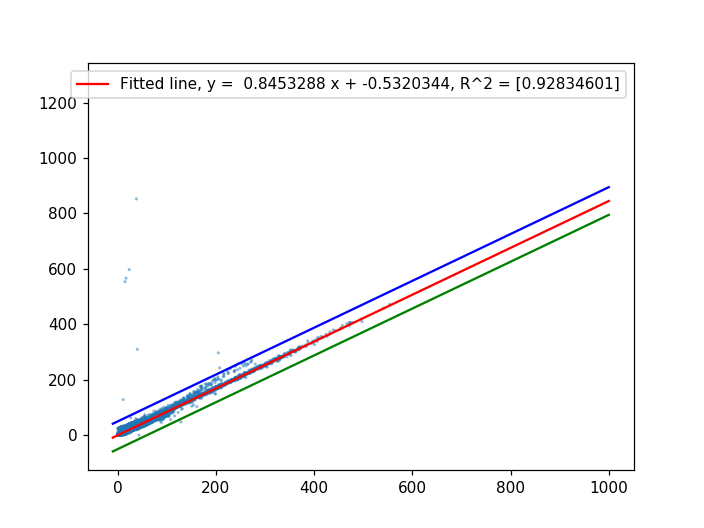

In [66]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

wb97x_energies = np.empty([])
xtb_energies = np.empty([])

wb97x_ref_eng = {"1": -0.4993212, "6": -37.8338334, "7": -54.5732825, "8": -75.0424519, 
                 "9": -99.6949007, "16": -398.0814169, "17": -460.1167006}
xtb_ref_eng = {"1": -0.39348276, "6": -1.79329637, "7": -2.60582416, "8": -3.76760695, 
               "9": -4.61933996, "16": -3.14645687, "17": -4.48252514}

db = anidataloader('./ani1x-20191001_wb97x_dz_xtb_H.h5')
for i, data in enumerate(db):
    species = data['species']
    wb97x_data_energies = data['wb97x_dz_energies']
    xtb_data_energies = data['xtb_energies']
    wb97x_ref_data = 0.0
    xtb_ref_data = 0.0
    # for at in species:
    #     wb97x_ref_data += wb97x_ref_eng.get(str(at), 0.0)
    #     xtb_ref_data += xtb_ref_eng.get(str(at), 0.0)
    # print(wb97x_ref_data, xtb_ref_data)
    if wb97x_data_energies.size > 0:
        wb97x_ref_data = np.amin(wb97x_data_energies)
        xtb_ref_data = np.amin(xtb_data_energies)
    wb97x_data_energies = (wb97x_data_energies - wb97x_ref_data) * 627.509
    xtb_data_energies = (xtb_data_energies - xtb_ref_data) * 627.509
    fitted_wb97x_data_energies = wb97x_data_energies # * 0.909214 - 0.1301683
    xtb_fit_diff = xtb_data_energies - fitted_wb97x_data_energies
    index_list = np.argwhere(abs(xtb_fit_diff) > 100.).reshape(-1)
    if index_list.size:
        print(data['path'], index_list)
        print('wb97x_data_energies', data['wb97x_dz_energies'][index_list], wb97x_data_energies[index_list])
        print('xtb_data_energies', data['xtb_energies'][index_list], xtb_data_energies[index_list])
    wb97x_energies = np.concatenate((wb97x_energies, wb97x_data_energies), axis=None)
    xtb_energies = np.concatenate((xtb_energies, xtb_data_energies), axis=None)

A = np.vstack([wb97x_energies, np.ones(len(wb97x_energies))]).T
model, resid = np.linalg.lstsq(A, xtb_energies, rcond=None)[:2]
m, c = model
r2 = 1 - resid / (xtb_energies.size * xtb_energies.var())
rmse = np.linalg.norm(m*wb97x_energies + c - xtb_energies) / np.sqrt(len(wb97x_energies))
print('RMSE =', rmse)
x2 = np.linspace(start = -10., stop = 1000.0, num = 1011)

plt.figure(3)
plt.scatter(wb97x_energies, xtb_energies, edgecolors='none', s=4, alpha=0.5)
# plt.ylim(-10, 2.0)
plt.plot(x2, m*x2 + c, 'r', label=('Fitted line, y = %10.7f x + %10.7f, R^2 = %s' % (m, c, r2)))
plt.plot(x2, m*x2 + c + 50., 'b')
plt.plot(x2, m*x2 + c - 50., 'g')
# plt.plot(x2, x2, 'c')
plt.legend()
plt.show()
    

/N2O1 [  0  12  13  23  29  33  40  42  45  53  59  68  91 117 118 129]
wb97x_data_energies [-184.60416326 -184.60330413 -184.60098341 -184.60228882 -184.6024031
 -184.59908955 -184.60272455 -184.6054965  -184.59555954 -184.59889168
 -184.60209275 -184.60008895 -184.60230768 -184.60479756 -184.59898917
 -184.59947614] [ 4.87915983  5.4182729   6.87454872  6.0553922   5.98367984  8.06295789
  5.78196268  4.04254413 10.27807345  8.18712624  6.17842349  7.4358254
  6.04355675  4.4811359   8.12594976  7.82037107]
xtb_data_energies [-9.82517581 -9.82778383 -9.8231539  -9.82572464 -9.82471364 -9.8227723
 -9.82616932 -9.83019582 -9.82034805 -9.84023345 -9.82603337 -9.82304762
 -9.82572295 -9.82945476 -9.82330928 -9.82330814] [12.28732903 10.65077301 13.55609575 11.94293327 12.57734486 13.79555319
 11.66389256  9.13722757 15.31679188  2.83852441 11.74920241 13.62278741
 11.94399376  9.60224939 13.4585934  13.45930876]
RMSE = 1.4050045590975386


<IPython.core.display.Javascript object>


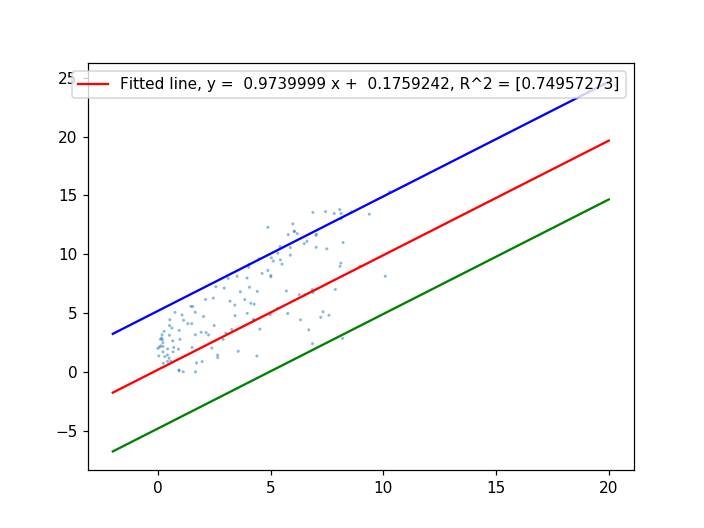

In [103]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

wb97x_energies = np.empty([])
xtb_energies = np.empty([])

wb97x_ref_eng = {"1": -0.4993212, "6": -37.8338334, "7": -54.5732825, "8": -75.0424519, 
                 "9": -99.6949007, "16": -398.0814169, "17": -460.1167006}
xtb_ref_eng = {"1": -0.39348276, "6": -1.79329637, "7": -2.60582416, "8": -3.76760695, 
               "9": -4.61933996, "16": -3.14645687, "17": -4.48252514}

db = anidataloader('./ani1x-20191001_wb97x_dz_xtb_N-O.h5')
for i, data in enumerate(db):
    species = data['species']
    wb97x_data_energies = data['wb97x_dz_energies']
    xtb_data_energies = data['xtb_energies']
    wb97x_ref_data = 0.0
    xtb_ref_data = 0.0
    if wb97x_data_energies.size > 0:
        wb97x_ref_data = np.amin(wb97x_data_energies)
        xtb_ref_data = np.amin(xtb_data_energies)
    wb97x_data_energies = (wb97x_data_energies - wb97x_ref_data) * 627.509
    xtb_data_energies = (xtb_data_energies - xtb_ref_data) * 627.509
    fitted_wb97x_data_energies = wb97x_data_energies # * 0.909214 - 0.1301683
    xtb_fit_diff = xtb_data_energies - fitted_wb97x_data_energies
    index_list = np.argwhere(abs(xtb_fit_diff) > 5.0).reshape(-1)
    if index_list.size:
        print(data['path'], index_list)
        print('wb97x_data_energies', data['wb97x_dz_energies'][index_list], wb97x_data_energies[index_list])
        print('xtb_data_energies', data['xtb_energies'][index_list], xtb_data_energies[index_list])
    wb97x_energies = np.concatenate((wb97x_energies, wb97x_data_energies), axis=None)
    xtb_energies = np.concatenate((xtb_energies, xtb_data_energies), axis=None)

A = np.vstack([wb97x_energies, np.ones(len(wb97x_energies))]).T
model, resid = np.linalg.lstsq(A, xtb_energies, rcond=None)[:2]
m, c = model
r2 = 1 - resid / (xtb_energies.size * xtb_energies.var())
rmse = np.linalg.norm(m*wb97x_energies + c - xtb_energies) / np.sqrt(len(wb97x_energies))
print('RMSE =', rmse)
x2 = np.linspace(start = -2., stop = 20.0, num = 221)

plt.figure(4)
plt.scatter(wb97x_energies[375:510], xtb_energies[375:510], edgecolors='none', s=4, alpha=0.5)
# plt.ylim(-10, 2.0)
plt.plot(x2, m*x2 + c, 'r', label=('Fitted line, y = %10.7f x + %10.7f, R^2 = %s' % (m, c, r2)))
plt.plot(x2, m*x2 + c + 5., 'b')
plt.plot(x2, m*x2 + c - 5., 'g')
# plt.plot(x2, x2, 'c')
plt.legend()
plt.show()
    

xtb_data_energies [  39.6517164    44.93327768  852.28877299   46.8418965    58.38567129
   48.35711738   53.73257911  309.64561499   73.68366928   36.19868498
   48.55934471   37.96815368  597.33165293   24.8967647   566.0635258
  128.05771318   35.13116039  242.59680545 1274.88652881   39.355369
   36.86113368   25.53571319  553.94987871   34.33594961   62.7631176
   19.35236501   28.75252513   23.4985617    27.02242007]
xtb_data_energies2 [  27.02587137  725.05479087   49.89617733  653.31020598   47.24569227
   56.5034455    73.34139449  125.35149904   91.91445608   38.04937845
   45.95505686   31.69688521   45.31355441   28.47488377  572.65591572
   97.49170587 1222.76177837  156.35597827  531.57244341   34.31974105
  659.90341794   24.43019921   29.96489134   37.23669154   37.75020098
   21.7451635   419.34800594   25.5586863   716.02090775]


<IPython.core.display.Javascript object>


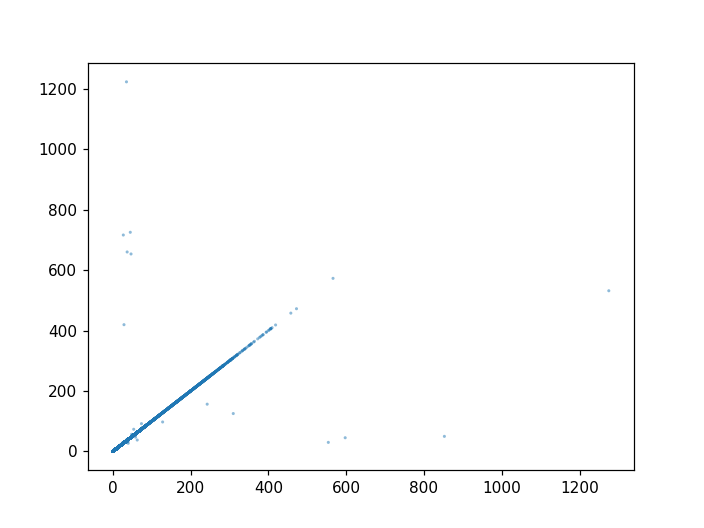

In [107]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

wb97x_energies = np.empty([])
xtb_energies = np.empty([])

wb97x_ref_eng = {"1": -0.4993212, "6": -37.8338334, "7": -54.5732825, "8": -75.0424519, 
                 "9": -99.6949007, "16": -398.0814169, "17": -460.1167006}
xtb_ref_eng = {"1": -0.39348276, "6": -1.79329637, "7": -2.60582416, "8": -3.76760695, 
               "9": -4.61933996, "16": -3.14645687, "17": -4.48252514}

db = anidataloader('./ani1x-20191001_wb97x_dz_xtb_H.h5')
for i, data in enumerate(db):
    species = data['species']
    wb97x_data_energies = data['wb97x_dz_energies']
    xtb_data_energies = data['xtb_energies']
    wb97x_ref_data = 0.0
    xtb_ref_data = 0.0
    if wb97x_data_energies.size > 0:
        wb97x_ref_data = np.amin(wb97x_data_energies)
        xtb_ref_data = np.amin(xtb_data_energies)
    wb97x_data_energies = (wb97x_data_energies - wb97x_ref_data) * 627.509
    xtb_data_energies = (xtb_data_energies - xtb_ref_data) * 627.509
    fitted_wb97x_data_energies = wb97x_data_energies # * 0.909214 - 0.1301683
    xtb_fit_diff = xtb_data_energies - fitted_wb97x_data_energies
    index_list = np.argwhere(abs(xtb_fit_diff) > 5.0).reshape(-1)
    # if index_list.size:
        # print(data['path'], index_list)
        # print('wb97x_data_energies', data['wb97x_dz_energies'][index_list], wb97x_data_energies[index_list])
        # print('xtb_data_energies', data['xtb_energies'][index_list], xtb_data_energies[index_list])
    wb97x_energies = np.concatenate((wb97x_energies, wb97x_data_energies), axis=None)
    xtb_energies = np.concatenate((xtb_energies, xtb_data_energies), axis=None)

wb97x_energies2 = np.empty([])
xtb_energies2 = np.empty([])

db2 = anidataloader('./ani1x-20191001_wb97x_dz_xtb_new_H.h5')
for i, data in enumerate(db2):
    species2 = data['species']
    wb97x_data_energies2 = data['wb97x_dz_energies']
    xtb_data_energies2 = data['xtb_energies']
    wb97x_ref_data2 = 0.0
    xtb_ref_data2 = 0.0
    if wb97x_data_energies2.size > 0:
        wb97x_ref_data2 = np.amin(wb97x_data_energies2)
        xtb_ref_data2 = np.amin(xtb_data_energies2)
    wb97x_data_energies2 = (wb97x_data_energies2 - wb97x_ref_data2) * 627.509
    xtb_data_energies2 = (xtb_data_energies2 - xtb_ref_data2) * 627.509
    fitted_wb97x_data_energies2 = wb97x_data_energies2 # * 0.909214 - 0.1301683
    xtb_fit_diff2 = xtb_data_energies2 - fitted_wb97x_data_energies2
    index_list2 = np.argwhere(abs(xtb_fit_diff2) > 5.0).reshape(-1)
    # if index_list2.size:
        # print(data['path'], index_list2)
        # print('wb97x_data_energies', data['wb97x_dz_energies'][index_list2], wb97x_data_energies2[index_list2])
        # print('xtb_data_energies', data['xtb_energies'][index_list2], xtb_data_energies2[index_list2])
    wb97x_energies2 = np.concatenate((wb97x_energies2, wb97x_data_energies2), axis=None)
    xtb_energies2 = np.concatenate((xtb_energies2, xtb_data_energies2), axis=None)

xtb_diff = xtb_energies2 - xtb_energies
index_list3 = np.argwhere(abs(xtb_diff) > 1.0).reshape(-1)
if index_list3.size:
    # print(data['path'], index_list3)
    print('xtb_data_energies', xtb_energies[index_list3])
    print('xtb_data_energies2', xtb_energies2[index_list3])

plt.figure(5)
plt.scatter(xtb_energies, xtb_energies2, edgecolors='none', s=4, alpha=0.5)
plt.show()



/C1Cl1F1H4 [335 338 362]
wb97x_data_energies [-598.78816171 -598.83438477 -598.82122052] [1063.68901055 1034.68362188 1042.94430974]
xtb_data_energies [-11.27912602 -11.33249586 -11.31864275] [1362.26004739 1328.76999246 1337.46294366]
/C1Cl1F1H4S1 [108 110 120 130 135 332 382 434]
wb97x_data_energies [-997.91669342 -997.61255083 -998.05398572 -998.15352303 -998.46823844
 -997.95072333 -998.13704881 -998.12642707] [458.09002066 648.94223694 371.93786616 309.47730955 111.99055859
 436.73595026 319.81502961 326.48026957]
xtb_data_energies [-16.20041081 -15.99001047 -16.26319232 -16.35549084 -16.24058811
 -16.16675328 -16.35028172 -16.33443244] [306.24880838 438.27691533 266.85284582 208.93469383 281.03719103
 327.36921137 212.20346351 222.14902936]
/C1Cl1F2H3 [122 145 166 168]
wb97x_data_energies [-698.90137516 -699.29502451 -698.99228547 -699.00116875] [502.70931229 255.69080295 445.6622752  440.08793391]
xtb_data_energies [-17.0909794  -17.4245552  -17.13157374 -17.17921759] [364.65058

<IPython.core.display.Javascript object>


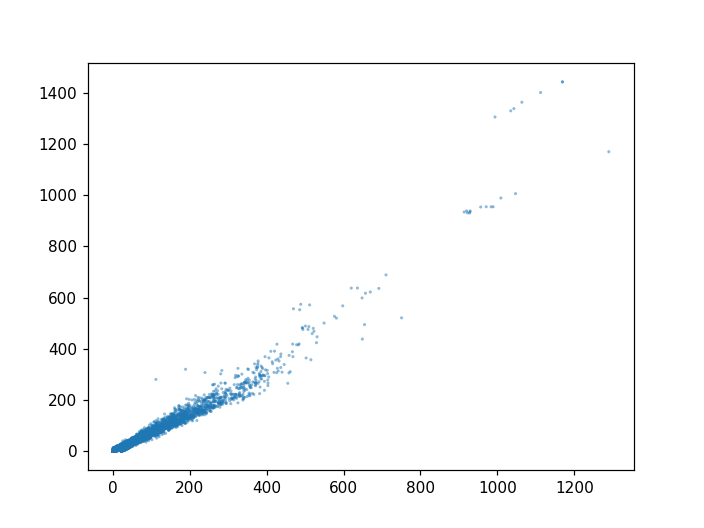

RMSE = 29.484549026458055


<IPython.core.display.Javascript object>


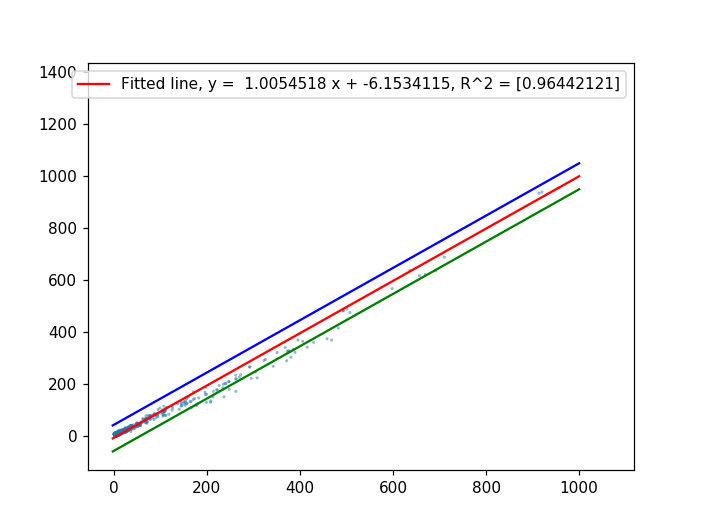

In [120]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

wb97x_energies = np.empty([])
xtb_energies = np.empty([])

wb97x_ref_eng = {"1": -0.4993212, "6": -37.8338334, "7": -54.5732825, "8": -75.0424519, 
                 "9": -99.6949007, "16": -398.0814169, "17": -460.1167006}
xtb_ref_eng = {"1": -0.39348276, "6": -1.79329637, "7": -2.60582416, "8": -3.76760695, 
               "9": -4.61933996, "16": -3.14645687, "17": -4.48252514}

db = anidataloader('./ani2x-20191001_wb97x_dz_xtb_C1Cl.h5')
for i, data in enumerate(db):
    species = data['species']
    wb97x_data_energies = data['wb97x_dz_energies']
    xtb_data_energies = data['xtb_energies']
    wb97x_ref_data = 0.0
    xtb_ref_data = 0.0
    if wb97x_data_energies.size > 0:
        wb97x_ref_data = np.amin(wb97x_data_energies)
        xtb_ref_data = np.amin(xtb_data_energies)
    wb97x_data_energies = (wb97x_data_energies - wb97x_ref_data) * 627.509
    xtb_data_energies = (xtb_data_energies - xtb_ref_data) * 627.509
    fitted_wb97x_data_energies = wb97x_data_energies # * 0.909214 - 0.1301683
    xtb_fit_diff = xtb_data_energies - fitted_wb97x_data_energies
    index_list = np.argwhere(abs(xtb_fit_diff) > 100.0).reshape(-1)
    if index_list.size:
        print(data['path'], index_list)
        print('wb97x_data_energies', data['wb97x_dz_energies'][index_list], wb97x_data_energies[index_list])
        print('xtb_data_energies', data['xtb_energies'][index_list], xtb_data_energies[index_list])
    wb97x_energies = np.concatenate((wb97x_energies, wb97x_data_energies), axis=None)
    xtb_energies = np.concatenate((xtb_energies, xtb_data_energies), axis=None)

plt.figure(3)
plt.scatter(wb97x_energies, xtb_energies, edgecolors='none', s=4, alpha=0.5)
plt.show()

index_range = range(834, 1360)
wb97x_energies = wb97x_energies[index_range]
xtb_energies = xtb_energies[index_range]

A = np.vstack([wb97x_energies, np.ones(len(wb97x_energies))]).T
model, resid = np.linalg.lstsq(A, xtb_energies, rcond=None)[:2]
m, c = model
r2 = 1 - resid / (xtb_energies.size * xtb_energies.var())
rmse = np.linalg.norm(m*wb97x_energies + c - xtb_energies) / np.sqrt(len(wb97x_energies))
print('RMSE =', rmse)
x2 = np.linspace(start = -2., stop = 1000.0, num = 1003)

plt.figure(4)
plt.scatter(wb97x_energies, xtb_energies, edgecolors='none', s=4, alpha=0.5)
# plt.ylim(-10, 2.0)
plt.plot(x2, m*x2 + c, 'r', label=('Fitted line, y = %10.7f x + %10.7f, R^2 = %s' % (m, c, r2)))
plt.plot(x2, m*x2 + c + 50., 'b')
plt.plot(x2, m*x2 + c - 50., 'g')
# plt.plot(x2, x2, 'c')
plt.legend()
plt.show()
    

RMSE = 0.900987055400015


<IPython.core.display.Javascript object>


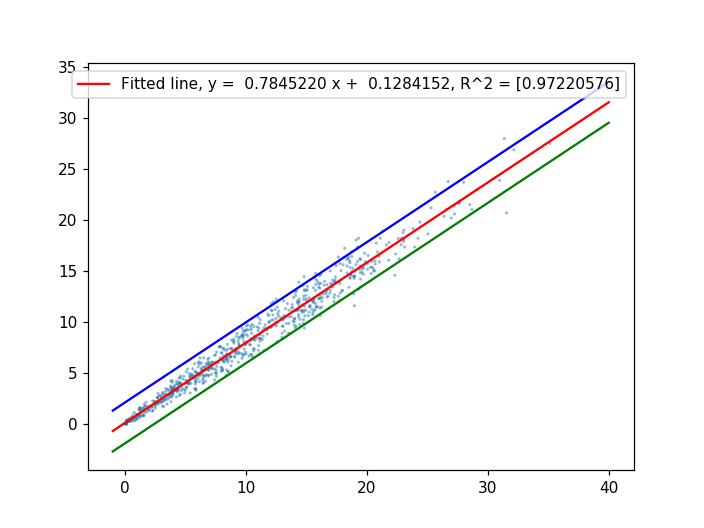

In [213]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

wb97x_energies = np.empty([])
xtb_energies = np.empty([])

wb97x_ref_eng = {"1": -0.4993212, "6": -37.8338334, "7": -54.5732825, "8": -75.0424519, 
                 "9": -99.6949007, "16": -398.0814169, "17": -460.1167006}
xtb_ref_eng = {"1": -0.39348276, "6": -1.79329637, "7": -2.60582416, "8": -3.76760695, 
               "9": -4.61933996, "16": -3.14645687, "17": -4.48252514}

db = anidataloader('./ani2x-20191001_wb97x_dz_xtb_C1Cl.h5')
for i, data in enumerate(db):
    species = data['species']
    wb97x_data_energies = data['wb97x_dz_energies']
    xtb_data_energies = data['xtb_energies']
    wb97x_ref_data = 0.0
    xtb_ref_data = 0.0
    if wb97x_data_energies.size > 0:
        wb97x_ref_data = np.amin(wb97x_data_energies)
        xtb_ref_data = np.amin(xtb_data_energies)
    wb97x_data_energies = (wb97x_data_energies - wb97x_ref_data) * 627.509
    xtb_data_energies = (xtb_data_energies - xtb_ref_data) * 627.509
    fitted_wb97x_data_energies = wb97x_data_energies # * 0.909214 - 0.1301683
    xtb_fit_diff = xtb_data_energies - fitted_wb97x_data_energies
    index_list = np.argwhere(abs(xtb_fit_diff) > 500.0).reshape(-1)
    if index_list.size:
        print(data['path'], index_list)
        print('wb97x_data_energies', data['wb97x_dz_energies'][index_list], wb97x_data_energies[index_list])
        print('xtb_data_energies', data['xtb_energies'][index_list], xtb_data_energies[index_list])
    wb97x_energies = np.concatenate((wb97x_energies, wb97x_data_energies), axis=None)
    xtb_energies = np.concatenate((xtb_energies, xtb_data_energies), axis=None)

# plt.figure(301)
# plt.scatter(wb97x_energies, xtb_energies, edgecolors='none', s=4, alpha=0.5)
# plt.show()

index_range = range(1838, 1838+746-1)
wb97x_energies = wb97x_energies[index_range]
xtb_energies = xtb_energies[index_range]

A = np.vstack([wb97x_energies, np.ones(len(wb97x_energies))]).T
model, resid = np.linalg.lstsq(A, xtb_energies, rcond=None)[:2]
m, c = model
r2 = 1 - resid / (xtb_energies.size * xtb_energies.var())
rmse = np.linalg.norm(m*wb97x_energies + c - xtb_energies) / np.sqrt(len(wb97x_energies))
print('RMSE =', rmse)
x2 = np.linspace(start = -1., stop = 40.0, num = 411)

plt.figure(401)
plt.scatter(wb97x_energies, xtb_energies, edgecolors='none', s=4, alpha=0.5)
# plt.ylim(-10, 2.0)
plt.plot(x2, m*x2 + c, 'r', label=('Fitted line, y = %10.7f x + %10.7f, R^2 = %s' % (m, c, r2)))
plt.plot(x2, m*x2 + c + 2., 'b')
plt.plot(x2, m*x2 + c - 2., 'g')
# plt.plot(x2, x2, 'c')
plt.legend()
plt.show()


RMSE = 9.438417666805746


<IPython.core.display.Javascript object>


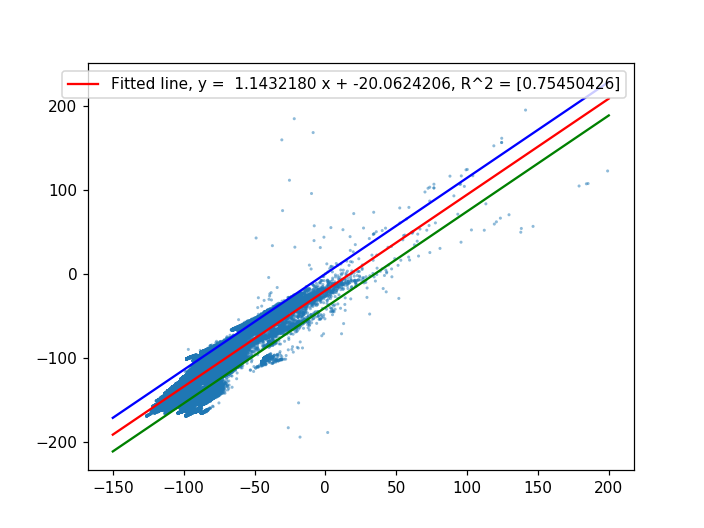

In [141]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

wb97x_energies = np.empty([])
xtb_energies = np.empty([])

wb97x_ref_eng = {"1": -0.4993212, "6": -37.8338334, "7": -54.5732825, "8": -75.0424519, 
                 "9": -99.6949007, "16": -398.0814169, "17": -460.1167006}
xtb_ref_eng = {"1": -0.39348276, "6": -1.79329637, "7": -2.60582416, "8": -3.76760695, 
               "9": -4.61933996, "16": -3.14645687, "17": -4.48252514}

db = anidataloader('./ani2x-20191001_wb97x_dz_xtb_repack.h5')
for i, data in enumerate(db):
    species = data['species']
    n_atom = len(data['species'])
    wb97x_data_energies = data['wb97x_dz_energies']
    xtb_data_energies = data['xtb_energies']
    wb97x_ref_data = 0.0
    xtb_ref_data = 0.0
    
    """
    d = np.abs(wb97x_data_energies - np.median(wb97x_data_energies))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    index_selected = np.argwhere(s < 3.0).reshape(-1)
    wb97x_data_energies = wb97x_data_energies[index_selected]
    xtb_data_energies = xtb_data_energies[index_selected]

    d = np.abs(xtb_data_energies - np.median(xtb_data_energies))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    index_selected = np.argwhere(s < 3.0).reshape(-1)
    wb97x_data_energies = wb97x_data_energies[index_selected]
    xtb_data_energies = xtb_data_energies[index_selected]
    """
    
    for at in species:
        wb97x_ref_data += wb97x_ref_eng.get(str(at), 0.0)
        xtb_ref_data += xtb_ref_eng.get(str(at), 0.0)
    # if wb97x_data_energies.size > 0:
    #     wb97x_ref_data = np.amin(wb97x_data_energies)
    #     xtb_ref_data = np.amin(xtb_data_energies)
    wb97x_data_energies = (wb97x_data_energies - wb97x_ref_data) * 627.509 / float(n_atom)
    xtb_data_energies = (xtb_data_energies - xtb_ref_data) * 627.509 / float(n_atom)

    index_list = np.argwhere(abs(wb97x_data_energies) < 200.0).reshape(-1)
    wb97x_data_energies = wb97x_data_energies[index_list]    
    xtb_data_energies = xtb_data_energies[index_list]
    
    index_list = np.argwhere(abs(xtb_data_energies) < 200.0).reshape(-1)
    wb97x_data_energies = wb97x_data_energies[index_list]
    xtb_data_energies = xtb_data_energies[index_list]
    
    wb97x_energies = np.concatenate((wb97x_energies, wb97x_data_energies), axis=None)
    xtb_energies = np.concatenate((xtb_energies, xtb_data_energies), axis=None)

"""
plt.figure(5)
plt.scatter(wb97x_energies, xtb_energies, edgecolors='none', s=4, alpha=0.5)
plt.show()
"""

A = np.vstack([wb97x_energies, np.ones(len(wb97x_energies))]).T
model, resid = np.linalg.lstsq(A, xtb_energies, rcond=None)[:2]
m, c = model
r2 = 1 - resid / (xtb_energies.size * xtb_energies.var())
rmse = np.linalg.norm(m*wb97x_energies + c - xtb_energies) / np.sqrt(len(wb97x_energies))
print('RMSE =', rmse)
x2 = np.linspace(start = -150., stop = 200.0, num = 351)

plt.figure(7)
plt.scatter(wb97x_energies, xtb_energies, edgecolors='none', s=4, alpha=0.5)
# plt.ylim(-10, 2.0)
plt.plot(x2, m*x2 + c, 'r', label=('Fitted line, y = %10.7f x + %10.7f, R^2 = %s' % (m, c, r2)))
plt.plot(x2, m*x2 + c + 20., 'b')
plt.plot(x2, m*x2 + c - 20., 'g')
# plt.plot(x2, x2, 'c')
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


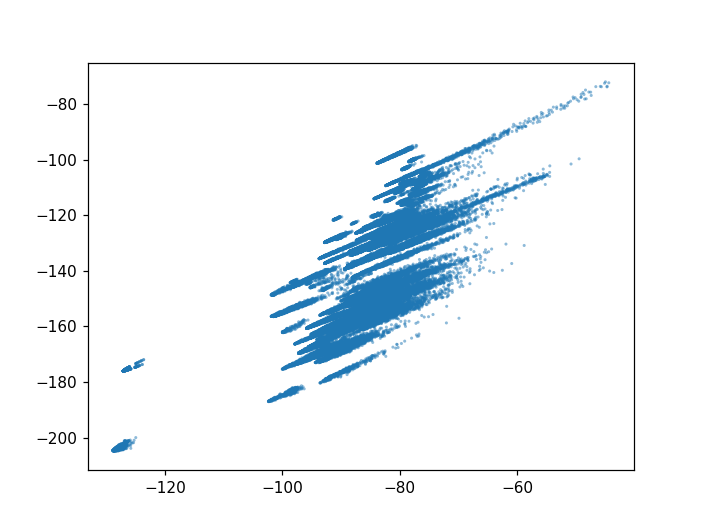

In [177]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt


wb97x_ref_eng = {"1": -0.4993212, "6": -37.8338334, "7": -54.5732825, "8": -75.0424519, 
                 "9": -99.6949007, "16": -398.0814169, "17": -460.1167006}
xtb_ref_eng = {"1": -0.39348276, "6": -1.79329637, "7": -2.60582416, "8": -3.76760695, 
               "9": -4.61933996, "16": -3.14645687, "17": -4.48252514}

db = anidataloader('./ani1x-20191001_wb97x_dz_xtb_C1.h5')
for i, data in enumerate(db):
    species = data['species']
    n_atom = len(data['species'])
    wb97x_data_energies = data['wb97x_dz_energies']
    xtb_data_energies = data['xtb_energies']
    wb97x_ref_data = 0.0
    xtb_ref_data = 0.0
    
    for at in species:
        wb97x_ref_data += wb97x_ref_eng.get(str(at), 0.0)
        xtb_ref_data += xtb_ref_eng.get(str(at), 0.0)
    # if wb97x_data_energies.size > 0:
    #     wb97x_ref_data = np.amin(wb97x_data_energies)
    #     xtb_ref_data = np.amin(xtb_data_energies)
    wb97x_data_energies = (wb97x_data_energies - wb97x_ref_data) * 627.509 / float(n_atom)
    xtb_data_energies = (xtb_data_energies - xtb_ref_data) * 627.509 / float(n_atom)
    # index_list = np.argwhere(abs(wb97x_data_energies) < 1000.0).reshape(-1)
    # wb97x_data_energies = wb97x_data_energies[index_list]
    # xtb_data_energies = xtb_data_energies[index_list]
    if i == 0:
        wb97x_energies = wb97x_data_energies
        xtb_energies = xtb_data_energies
    else:
        wb97x_energies = np.concatenate((wb97x_energies, wb97x_data_energies), axis=None)
        xtb_energies = np.concatenate((xtb_energies, xtb_data_energies), axis=None)

# index_range = range(2002, 2002+3287-1)
# wb97x_energies = wb97x_energies[index_range]
# xtb_energies = xtb_energies[index_range]

plt.figure(6)
plt.scatter(wb97x_energies, xtb_energies, edgecolors='none', s=4, alpha=0.5)
plt.show()



<IPython.core.display.Javascript object>


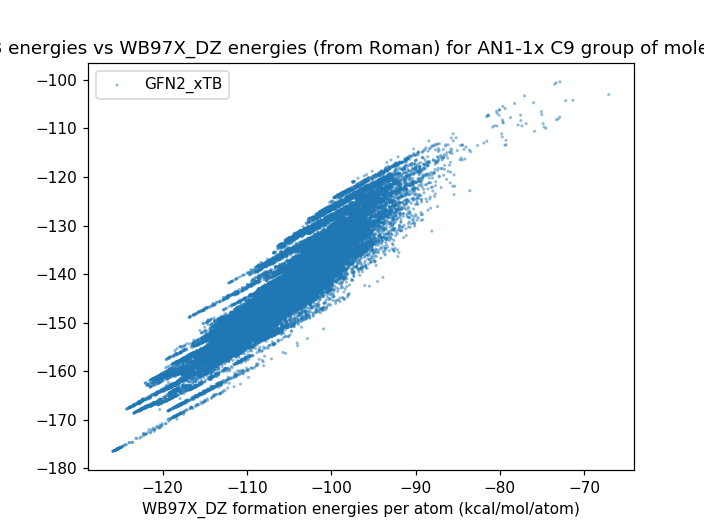

In [203]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

wb97x_ref_eng = {"1": -0.4993212, "6": -37.8338334, "7": -54.5732825, "8": -75.0424519, 
                 "9": -99.6949007, "16": -398.0814169, "17": -460.1167006}
xtb_ref_eng = {"1": -0.39348276, "6": -1.79329637, "7": -2.60582416, "8": -3.76760695, 
               "9": -4.61933996, "16": -3.14645687, "17": -4.48252514}

db = anidataloader('./ani1x-20191001_wb97x_dz_xtb_C9.h5')
for i, data in enumerate(db):
    species = data['species']
    n_atom = len(data['species'])
    wb97x_data_energies = data['wb97x_dz_energies']
    xtb_data_energies = data['xtb_energies']
    wb97x_ref_data = 0.0
    xtb_ref_data = 0.0
    
    for at in species:
        wb97x_ref_data += wb97x_ref_eng.get(str(at), 0.0)
        xtb_ref_data += xtb_ref_eng.get(str(at), 0.0)
    # if wb97x_data_energies.size > 0:
    #     wb97x_ref_data = np.amin(wb97x_data_energies)
    #     xtb_ref_data = np.amin(xtb_data_energies)
    wb97x_data_energies = (wb97x_data_energies - wb97x_ref_data) * 627.509 / float(n_atom)
    xtb_data_energies = (xtb_data_energies - xtb_ref_data) * 627.509 / float(n_atom)
    '''
    index_list = np.argwhere(abs(wb97x_data_energies) > 300.0).reshape(-1)
    if index_list.size:
        print(data['path'], index_list)
        print('wb97x_data_energies', data['wb97x_dz_energies'][index_list], wb97x_data_energies[index_list])
        print('xtb_data_energies', data['xtb_energies'][index_list], xtb_data_energies[index_list])
    
    index_list1 = np.argwhere(abs(wb97x_data_energies) < 200.0).reshape(-1)
    wb97x_data_energies = wb97x_data_energies[index_list1]
    xtb_data_energies = xtb_data_energies[index_list1]
    '''
    if i == 0:
        wb97x_energies = wb97x_data_energies
        xtb_energies = xtb_data_energies
    else:
        wb97x_energies = np.concatenate((wb97x_energies, wb97x_data_energies), axis=None)
        xtb_energies = np.concatenate((xtb_energies, xtb_data_energies), axis=None)

plt.figure(6)
plt.scatter(wb97x_energies, xtb_energies, edgecolors='none', s=4, alpha=0.5, label=('GFN2_xTB'))
plt.title("XTB energies vs WB97X_DZ energies (from Roman) for AN1-1x C9 group of molecules")
plt.xlabel("WB97X_DZ formation energies per atom (kcal/mol/atom)")
# plt.ylabel("y-label")
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


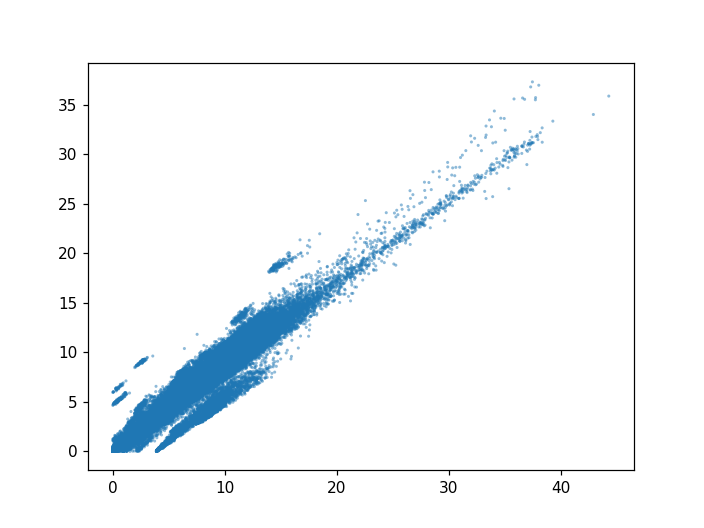

In [179]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

wb97x_ref_eng = {"1": -0.4993212, "6": -37.8338334, "7": -54.5732825, "8": -75.0424519, 
                 "9": -99.6949007, "16": -398.0814169, "17": -460.1167006}
xtb_ref_eng = {"1": -0.39348276, "6": -1.79329637, "7": -2.60582416, "8": -3.76760695, 
               "9": -4.61933996, "16": -3.14645687, "17": -4.48252514}

db = anidataloader('./ani1x-20191001_wb97x_dz_xtb_C1.h5')
for i, data in enumerate(db):
    species = data['species']
    n_atom = len(data['species'])
    wb97x_data_energies = data['wb97x_dz_energies']
    xtb_data_energies = data['xtb_energies']
    wb97x_ref_data = 0.0
    xtb_ref_data = 0.0
    
    for at in species:
        wb97x_ref_data += wb97x_ref_eng.get(str(at), 0.0)
        xtb_ref_data += xtb_ref_eng.get(str(at), 0.0)
    if wb97x_data_energies.size > 0:
        wb97x_ref_data = np.amin(wb97x_data_energies)
        xtb_ref_data = np.amin(xtb_data_energies)
    wb97x_data_energies = (wb97x_data_energies - wb97x_ref_data) * 627.509 / float(n_atom)
    xtb_data_energies = (xtb_data_energies - xtb_ref_data) * 627.509 / float(n_atom)
    # index_list = np.argwhere(abs(wb97x_data_energies) < 1000.0).reshape(-1)
    # wb97x_data_energies = wb97x_data_energies[index_list]
    # xtb_data_energies = xtb_data_energies[index_list]
    if i == 0:
        wb97x_energies = wb97x_data_energies
        xtb_energies = xtb_data_energies
    else:
        wb97x_energies = np.concatenate((wb97x_energies, wb97x_data_energies), axis=None)
        xtb_energies = np.concatenate((xtb_energies, xtb_data_energies), axis=None)

plt.figure(8)
plt.scatter(wb97x_energies, xtb_energies, edgecolors='none', s=4, alpha=0.5)
plt.show()


<IPython.core.display.Javascript object>


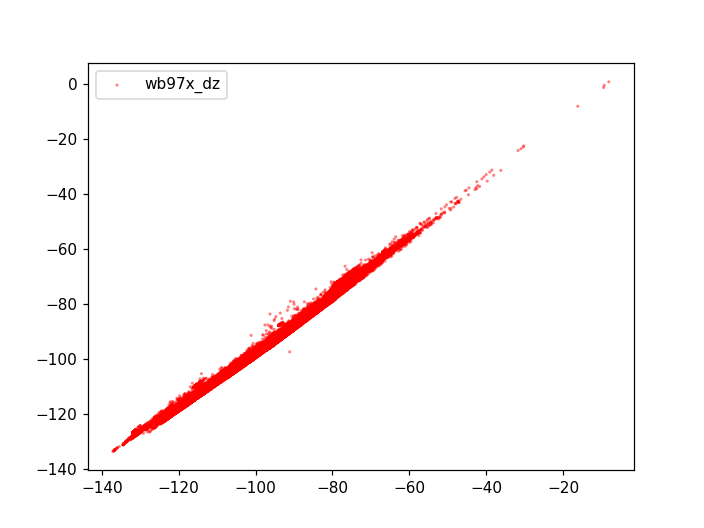

<IPython.core.display.Javascript object>


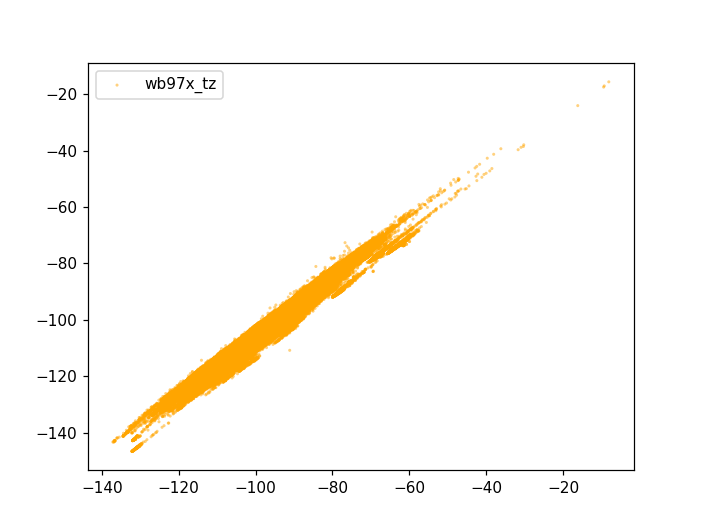

<IPython.core.display.Javascript object>


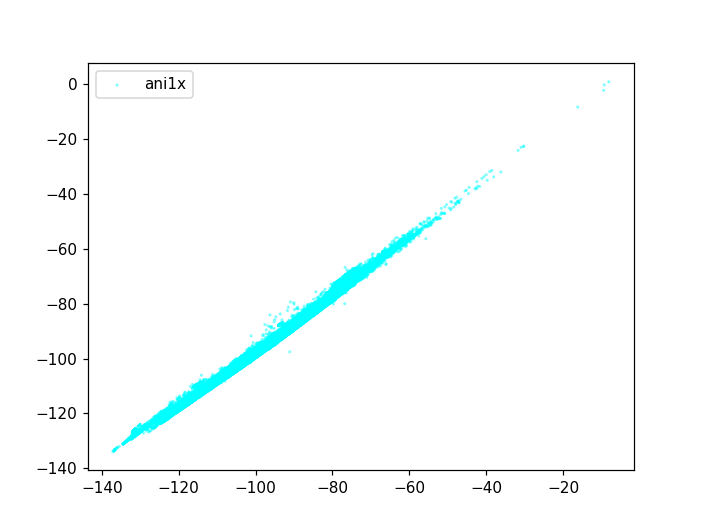

<IPython.core.display.Javascript object>


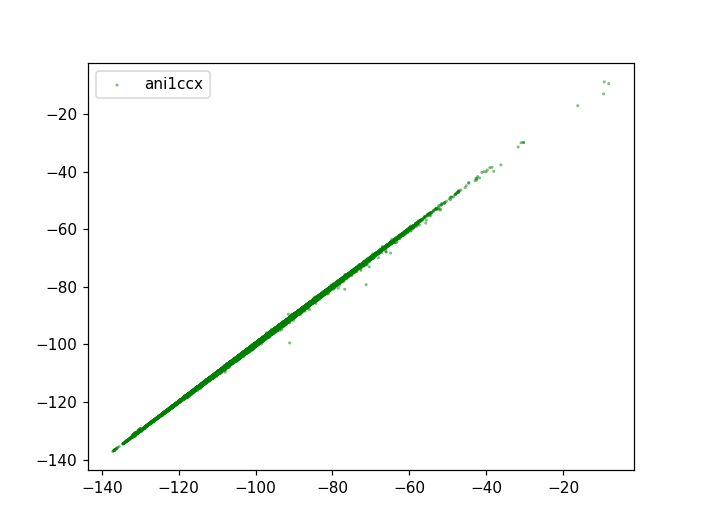

<IPython.core.display.Javascript object>


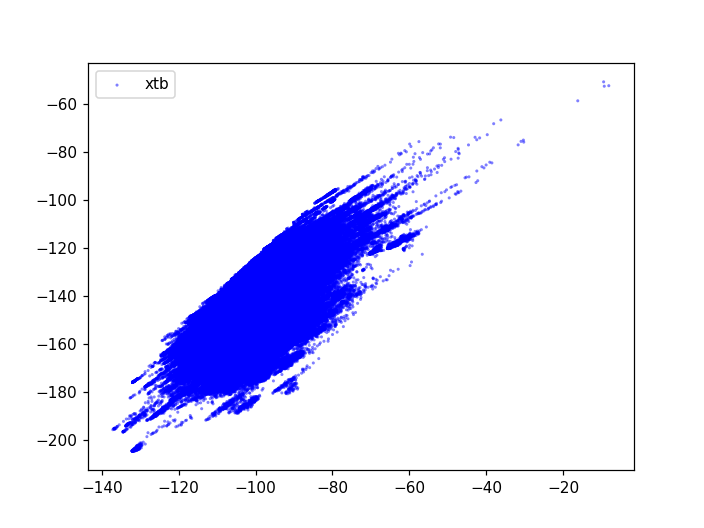

<IPython.core.display.Javascript object>


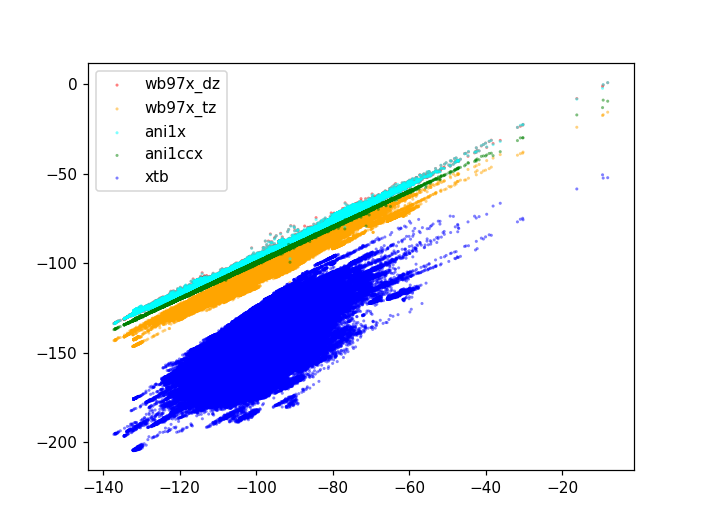

In [187]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

wb97x_dz_ref_eng = {"1": -0.4993212, "6": -37.8338334, "7": -54.5732825, "8": -75.0424519, 
                 "9": -99.6949007, "16": -398.0814169, "17": -460.1167006}
xtb_ref_eng = {"1": -0.39348276, "6": -1.79329637, "7": -2.60582416, "8": -3.76760695, 
               "9": -4.61933996, "16": -3.14645687, "17": -4.48252514}
wb97x_tz_ref_eng = {"1": -0.5013925, "6": -37.8459781, "7": -54.5915914, "8": -75.0768759, 
                 "9": -99.7471707, "16": -398.1079973, "17": -460.1467777}
ccsdt_ref_eng = {"1": -0.499945551382, "6": -37.789939698635, "7": -54.530780613581, "8": -75.005247682689, 
               "9": -99.668156212158, "16": -397.675555771164, "17": -4.48252514}

db = anidataloader('./ani1x-ccsdt_wb97x_dz_tz_xtb_ani.h5')
for i, data in enumerate(db):
    species = data['species']
    n_atom = len(data['species'])
    wb97x_dz_energies = data['wb97x_dz_energy']
    wb97x_tz_energies = data['wb97x_tz_energy']
    ccsdt_cbs_energies = data['ccsdt_cbs_energy']
    xtb_data_energies = data['xtb_energy']
    ani1x_energies = data['ani1x_energy'][:,8]
    ani1ccx_energies = data['ani1ccx_energy'][:,8]
    wb97x_dz_ref_data = 0.0
    wb97x_tz_ref_data = 0.0
    ccsdt_cbs_ref_data = 0.0
    xtb_ref_data = 0.0
    
    for at in species:
        wb97x_dz_ref_data += wb97x_dz_ref_eng.get(str(at), 0.0)
        wb97x_tz_ref_data += wb97x_dz_ref_eng.get(str(at), 0.0)
        ccsdt_cbs_ref_data += ccsdt_ref_eng.get(str(at), 0.0)
        xtb_ref_data += xtb_ref_eng.get(str(at), 0.0)
    # if wb97x_data_energies.size > 0:
    #     wb97x_ref_data = np.amin(wb97x_data_energies)
    #     xtb_ref_data = np.amin(xtb_data_energies)
    wb97x_dz_energies = (wb97x_dz_energies - wb97x_dz_ref_data) * 627.509 / float(n_atom)
    wb97x_tz_energies = (wb97x_tz_energies - wb97x_tz_ref_data) * 627.509 / float(n_atom)
    ccsdt_cbs_energies = (ccsdt_cbs_energies - ccsdt_cbs_ref_data) * 627.509 / float(n_atom)
    xtb_data_energies = (xtb_data_energies - xtb_ref_data) * 627.509 / float(n_atom)
    ani1x_energies = (ani1x_energies - wb97x_dz_ref_data) * 627.509 / float(n_atom)
    ani1ccx_energies = (ani1ccx_energies - ccsdt_cbs_ref_data) * 627.509 / float(n_atom)
    # index_list = np.argwhere(abs(wb97x_data_energies) < 1000.0).reshape(-1)
    # wb97x_data_energies = wb97x_data_energies[index_list]
    # xtb_data_energies = xtb_data_energies[index_list]
    if i == 0:
        wb97x_dz_all_energies = wb97x_dz_energies
        wb97x_tz_all_energies = wb97x_tz_energies
        ccsdt_cbs_all_energies = ccsdt_cbs_energies
        ani1x_all_energies = ani1x_energies
        ani1ccx_all_energies = ani1ccx_energies
        xtb_all_energies = xtb_data_energies
    else:
        wb97x_dz_all_energies = np.concatenate((wb97x_dz_all_energies, wb97x_dz_energies), axis=None)
        wb97x_tz_all_energies = np.concatenate((wb97x_tz_all_energies, wb97x_tz_energies), axis=None)
        ccsdt_cbs_all_energies = np.concatenate((ccsdt_cbs_all_energies, ccsdt_cbs_energies), axis=None)
        ani1x_all_energies = np.concatenate((ani1x_all_energies, ani1x_energies), axis=None)
        ani1ccx_all_energies = np.concatenate((ani1ccx_all_energies, ani1ccx_energies), axis=None)
        xtb_all_energies = np.concatenate((xtb_all_energies, xtb_data_energies), axis=None)

plt.figure(8)
plt.scatter(ccsdt_cbs_all_energies, wb97x_dz_all_energies, c='red', edgecolors='none', s=4, alpha=0.5, label=('wb97x_dz'))
plt.legend()
plt.figure(9)
plt.scatter(ccsdt_cbs_all_energies, wb97x_tz_all_energies, c='orange', edgecolors='none', s=4, alpha=0.5, label=('wb97x_tz'))
plt.legend()
plt.figure(10)
plt.scatter(ccsdt_cbs_all_energies, ani1x_all_energies, c='cyan', edgecolors='none', s=4, alpha=0.5, label=('ani1x'))
plt.legend()
plt.figure(11)
plt.scatter(ccsdt_cbs_all_energies, ani1ccx_all_energies, c='green', edgecolors='none', s=4, alpha=0.5, label=('ani1ccx'))
plt.legend()
plt.figure(12)
plt.scatter(ccsdt_cbs_all_energies, xtb_all_energies, c='blue', edgecolors='none', s=4, alpha=0.5, label=('xtb'))
plt.legend()
plt.figure(13)
plt.scatter(ccsdt_cbs_all_energies, wb97x_dz_all_energies, c='red', edgecolors='none', s=4, alpha=0.5, label=('wb97x_dz'))
plt.scatter(ccsdt_cbs_all_energies, wb97x_tz_all_energies, c='orange', edgecolors='none', s=4, alpha=0.5, label=('wb97x_tz'))
plt.scatter(ccsdt_cbs_all_energies, ani1x_all_energies, c='cyan', edgecolors='none', s=4, alpha=0.5, label=('ani1x'))
plt.scatter(ccsdt_cbs_all_energies, ani1ccx_all_energies, c='green', edgecolors='none', s=4, alpha=0.5, label=('ani1ccx'))
plt.scatter(ccsdt_cbs_all_energies, xtb_all_energies, c='blue', edgecolors='none', s=4, alpha=0.5, label=('xtb'))
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


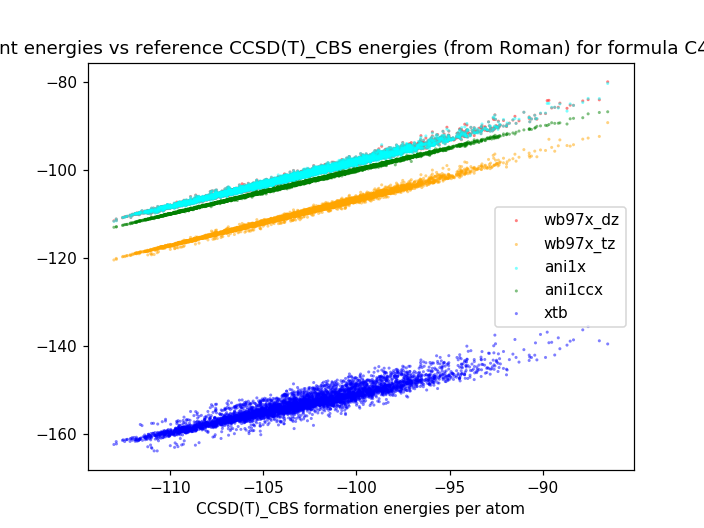

In [190]:
index_range = range(217407, 217407+5033-1)
plt.figure(14)
plt.scatter(ccsdt_cbs_all_energies[index_range], wb97x_dz_all_energies[index_range], c='red', edgecolors='none', s=4, alpha=0.5, label=('wb97x_dz'))
plt.scatter(ccsdt_cbs_all_energies[index_range], wb97x_tz_all_energies[index_range], c='orange', edgecolors='none', s=4, alpha=0.5, label=('wb97x_tz'))
plt.scatter(ccsdt_cbs_all_energies[index_range], ani1x_all_energies[index_range], c='cyan', edgecolors='none', s=4, alpha=0.5, label=('ani1x'))
plt.scatter(ccsdt_cbs_all_energies[index_range], ani1ccx_all_energies[index_range], c='green', edgecolors='none', s=4, alpha=0.5, label=('ani1ccx'))
plt.scatter(ccsdt_cbs_all_energies[index_range], xtb_all_energies[index_range], c='blue', edgecolors='none', s=4, alpha=0.5, label=('xtb'))
plt.title("Different energies vs reference CCSD(T)_CBS energies (from Roman) for formula C4H4N2O2")
plt.xlabel("CCSD(T)_CBS formation energies per atom (kcal/mol/atom)")
# plt.ylabel("y-label")
plt.legend()
plt.show()


RMSE = 0.775093272761577


<IPython.core.display.Javascript object>


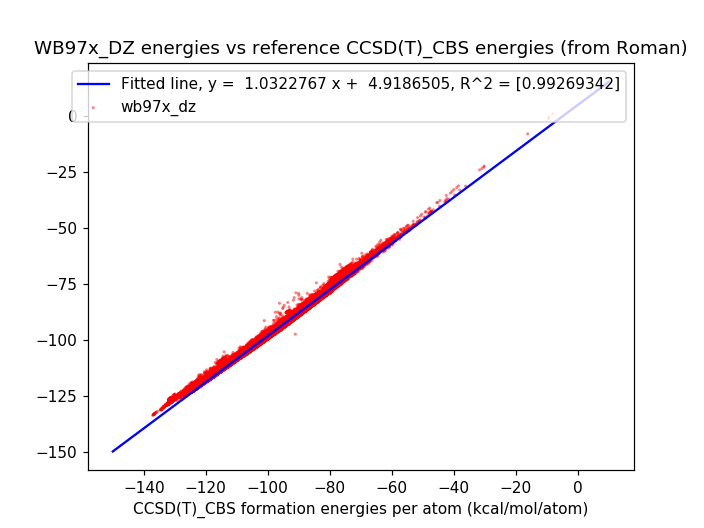

In [201]:
index_range = range(489193)
X = ccsdt_cbs_all_energies[index_range]
Y = wb97x_dz_all_energies[index_range]
A = np.vstack([X, np.ones(len(X))]).T
model, resid = np.linalg.lstsq(A, Y, rcond=None)[:2]
m, c = model
r2 = 1 - resid / (Y.size * Y.var())
rmse = np.linalg.norm(m*X + c - Y) / np.sqrt(len(Y))
print('RMSE =', rmse)
x2 = np.linspace(start = -150., stop = 10.0, num = 161)

plt.figure(15)
plt.clf()
plt.scatter(X, Y, c='red', edgecolors='none', s=4, alpha=0.5, label=('wb97x_dz'))
plt.plot(x2, m*x2 + c, c='blue', label=('Fitted line, y = %10.7f x + %10.7f, R^2 = %s' % (m, c, r2)))
plt.title("WB97x_DZ energies vs reference CCSD(T)_CBS energies (from Roman)")
plt.xlabel("CCSD(T)_CBS formation energies per atom (kcal/mol/atom)")
# plt.ylabel("y-label")
plt.legend()
plt.show()


RMSE = 10.09101486217552


<IPython.core.display.Javascript object>


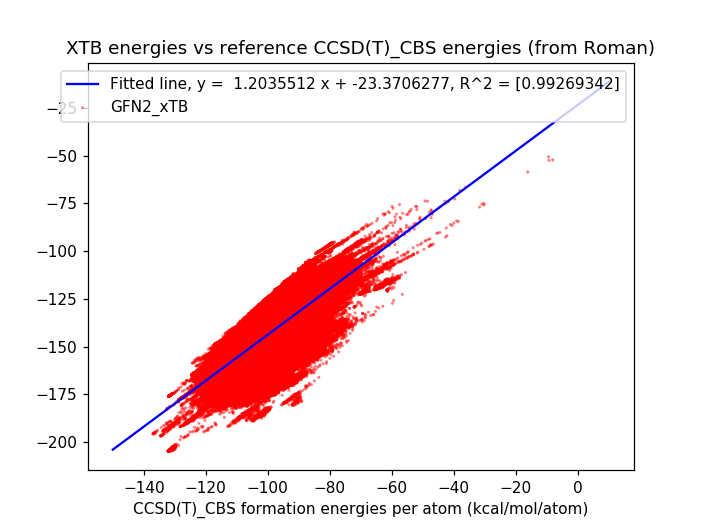

In [202]:
index_range = range(489193)
X = ccsdt_cbs_all_energies[index_range]
Y = xtb_all_energies[index_range]
A = np.vstack([X, np.ones(len(X))]).T
model1, resid1 = np.linalg.lstsq(A, Y, rcond=None)[:2]
m, c = model1
r1 = 1 - resid1 / (Y.size * Y.var())
rmse = np.linalg.norm(m*X + c - Y) / np.sqrt(len(Y))
print('RMSE =', rmse)
x1 = np.linspace(start = -150., stop = 10.0, num = 161)

plt.figure(16)
plt.scatter(X, Y, c='red', edgecolors='none', s=4, alpha=0.5, label=('GFN2_xTB'))
plt.plot(x1, m*x1 + c, c='blue', label=('Fitted line, y = %10.7f x + %10.7f, R^2 = %s' % (m, c, r2)))
plt.title("XTB energies vs reference CCSD(T)_CBS energies (from Roman)")
plt.xlabel("CCSD(T)_CBS formation energies per atom (kcal/mol/atom)")
# plt.ylabel("y-label")
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


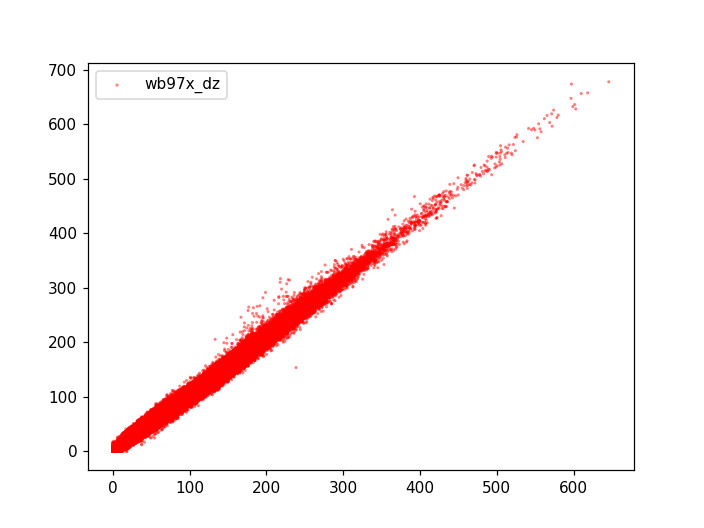

<IPython.core.display.Javascript object>


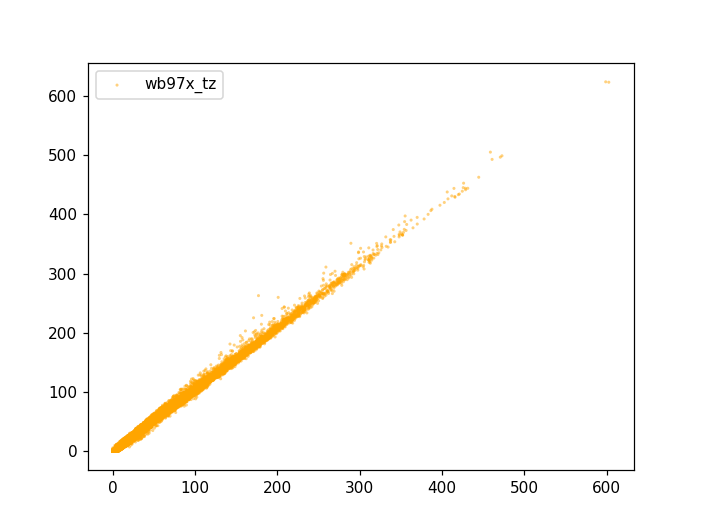

<IPython.core.display.Javascript object>


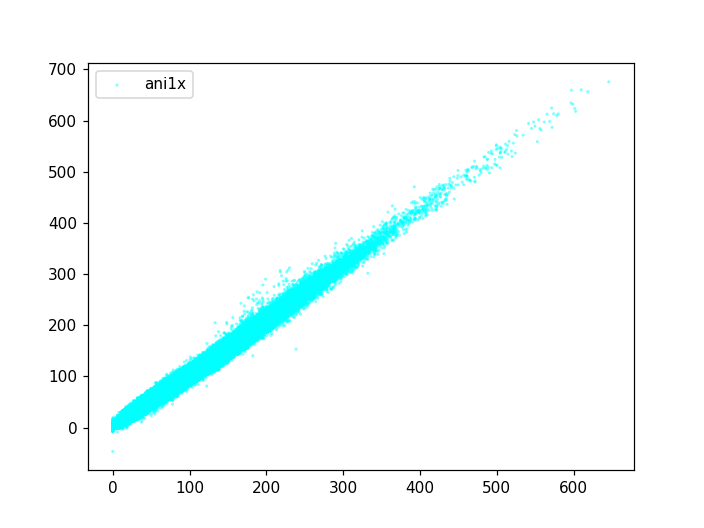

<IPython.core.display.Javascript object>


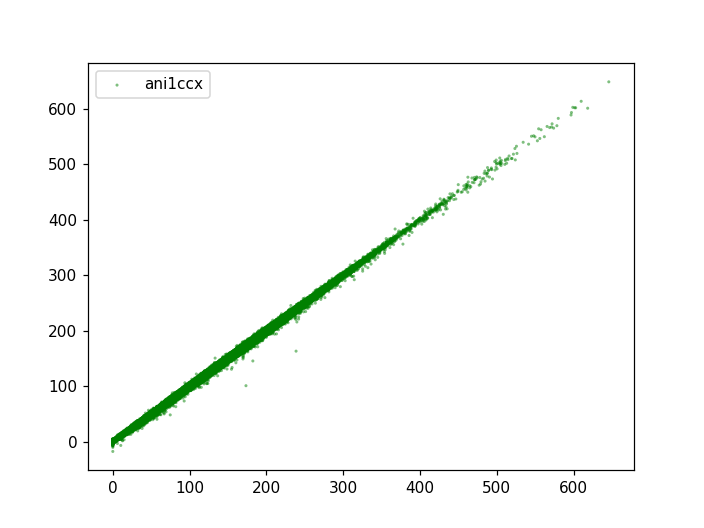

<IPython.core.display.Javascript object>


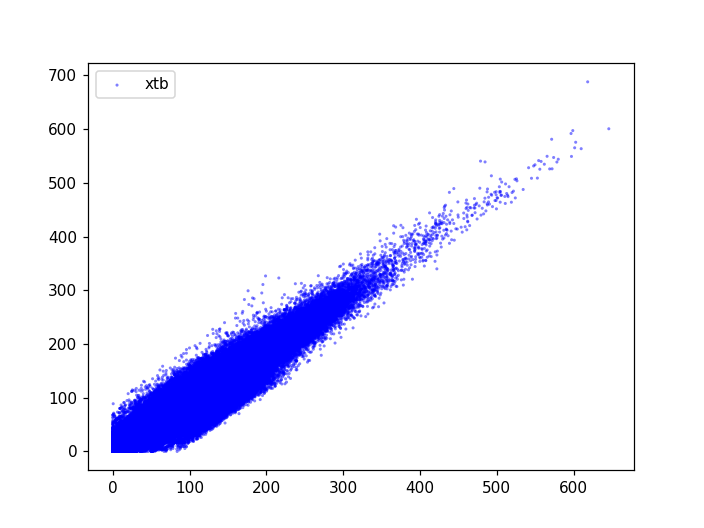

<IPython.core.display.Javascript object>


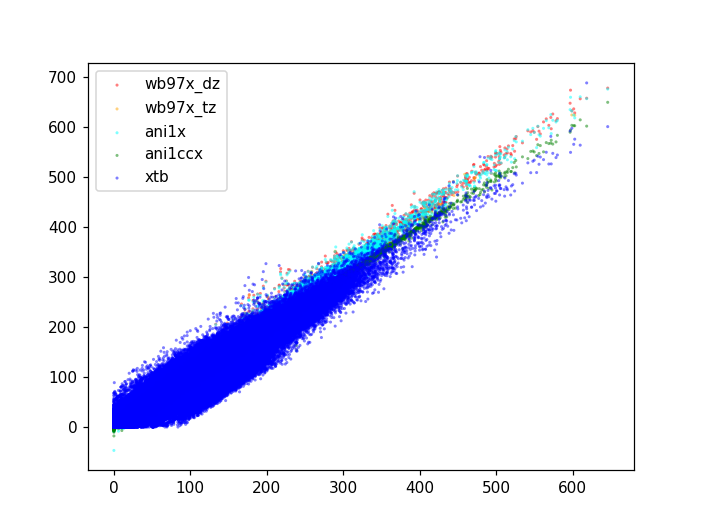

In [204]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

wb97x_dz_ref_eng = {"1": -0.4993212, "6": -37.8338334, "7": -54.5732825, "8": -75.0424519, 
                 "9": -99.6949007, "16": -398.0814169, "17": -460.1167006}
xtb_ref_eng = {"1": -0.39348276, "6": -1.79329637, "7": -2.60582416, "8": -3.76760695, 
               "9": -4.61933996, "16": -3.14645687, "17": -4.48252514}
wb97x_tz_ref_eng = {"1": -0.5013925, "6": -37.8459781, "7": -54.5915914, "8": -75.0768759, 
                 "9": -99.7471707, "16": -398.1079973, "17": -460.1467777}
ccsdt_ref_eng = {"1": -0.499945551382, "6": -37.789939698635, "7": -54.530780613581, "8": -75.005247682689, 
               "9": -99.668156212158, "16": -397.675555771164, "17": -4.48252514}

db = anidataloader('./ani1x-ccsdt_wb97x_dz_tz_xtb_ani.h5')
for i, data in enumerate(db):
    species = data['species']
    n_atom = len(data['species'])
    wb97x_dz_energies = data['wb97x_dz_energy']
    wb97x_tz_energies = data['wb97x_tz_energy']
    ccsdt_cbs_energies = data['ccsdt_cbs_energy']
    xtb_data_energies = data['xtb_energy']
    ani1x_energies = data['ani1x_energy'][:,8]
    ani1ccx_energies = data['ani1ccx_energy'][:,8]
    wb97x_dz_ref_data = 0.0
    wb97x_tz_ref_data = 0.0
    ccsdt_cbs_ref_data = 0.0
    xtb_ref_data = 0.0
    
    # for at in species:
    #     wb97x_dz_ref_data += wb97x_dz_ref_eng.get(str(at), 0.0)
    #     wb97x_tz_ref_data += wb97x_dz_ref_eng.get(str(at), 0.0)
    #     ccsdt_cbs_ref_data += ccsdt_ref_eng.get(str(at), 0.0)
    #     xtb_ref_data += xtb_ref_eng.get(str(at), 0.0)
    if wb97x_data_energies.size > 0:
        wb97x_dz_ref_data  = np.amin(wb97x_dz_energies)
        wb97x_tz_ref_data = np.amin(wb97x_tz_energies)
        ccsdt_cbs_ref_data = np.amin(ccsdt_cbs_energies)
        xtb_ref_data = np.amin(xtb_data_energies)

    wb97x_dz_energies = (wb97x_dz_energies - wb97x_dz_ref_data) * 627.509 # / float(n_atom)
    wb97x_tz_energies = (wb97x_tz_energies - wb97x_tz_ref_data) * 627.509 # / float(n_atom)
    ccsdt_cbs_energies = (ccsdt_cbs_energies - ccsdt_cbs_ref_data) * 627.509 # / float(n_atom)
    xtb_data_energies = (xtb_data_energies - xtb_ref_data) * 627.509 # / float(n_atom)
    ani1x_energies = (ani1x_energies - wb97x_dz_ref_data) * 627.509 # / float(n_atom)
    ani1ccx_energies = (ani1ccx_energies - ccsdt_cbs_ref_data) * 627.509 # / float(n_atom)
    # index_list = np.argwhere(abs(wb97x_data_energies) < 1000.0).reshape(-1)
    # wb97x_data_energies = wb97x_data_energies[index_list]
    # xtb_data_energies = xtb_data_energies[index_list]
    if i == 0:
        wb97x_dz_all_energies = wb97x_dz_energies
        wb97x_tz_all_energies = wb97x_tz_energies
        ccsdt_cbs_all_energies = ccsdt_cbs_energies
        ani1x_all_energies = ani1x_energies
        ani1ccx_all_energies = ani1ccx_energies
        xtb_all_energies = xtb_data_energies
    else:
        wb97x_dz_all_energies = np.concatenate((wb97x_dz_all_energies, wb97x_dz_energies), axis=None)
        wb97x_tz_all_energies = np.concatenate((wb97x_tz_all_energies, wb97x_tz_energies), axis=None)
        ccsdt_cbs_all_energies = np.concatenate((ccsdt_cbs_all_energies, ccsdt_cbs_energies), axis=None)
        ani1x_all_energies = np.concatenate((ani1x_all_energies, ani1x_energies), axis=None)
        ani1ccx_all_energies = np.concatenate((ani1ccx_all_energies, ani1ccx_energies), axis=None)
        xtb_all_energies = np.concatenate((xtb_all_energies, xtb_data_energies), axis=None)

plt.figure(18)
plt.scatter(ccsdt_cbs_all_energies, wb97x_dz_all_energies, c='red', edgecolors='none', s=4, alpha=0.5, label=('wb97x_dz'))
plt.legend()
plt.figure(19)
plt.scatter(ccsdt_cbs_all_energies, wb97x_tz_all_energies, c='orange', edgecolors='none', s=4, alpha=0.5, label=('wb97x_tz'))
plt.legend()
plt.figure(20)
plt.scatter(ccsdt_cbs_all_energies, ani1x_all_energies, c='cyan', edgecolors='none', s=4, alpha=0.5, label=('ani1x'))
plt.legend()
plt.figure(21)
plt.scatter(ccsdt_cbs_all_energies, ani1ccx_all_energies, c='green', edgecolors='none', s=4, alpha=0.5, label=('ani1ccx'))
plt.legend()
plt.figure(22)
plt.scatter(ccsdt_cbs_all_energies, xtb_all_energies, c='blue', edgecolors='none', s=4, alpha=0.5, label=('xtb'))
plt.legend()
plt.figure(23)
plt.scatter(ccsdt_cbs_all_energies, wb97x_dz_all_energies, c='red', edgecolors='none', s=4, alpha=0.5, label=('wb97x_dz'))
plt.scatter(ccsdt_cbs_all_energies, wb97x_tz_all_energies, c='orange', edgecolors='none', s=4, alpha=0.5, label=('wb97x_tz'))
plt.scatter(ccsdt_cbs_all_energies, ani1x_all_energies, c='cyan', edgecolors='none', s=4, alpha=0.5, label=('ani1x'))
plt.scatter(ccsdt_cbs_all_energies, ani1ccx_all_energies, c='green', edgecolors='none', s=4, alpha=0.5, label=('ani1ccx'))
plt.scatter(ccsdt_cbs_all_energies, xtb_all_energies, c='blue', edgecolors='none', s=4, alpha=0.5, label=('xtb'))
plt.legend()
plt.show()


RMSE = 5.788238411714716


<IPython.core.display.Javascript object>


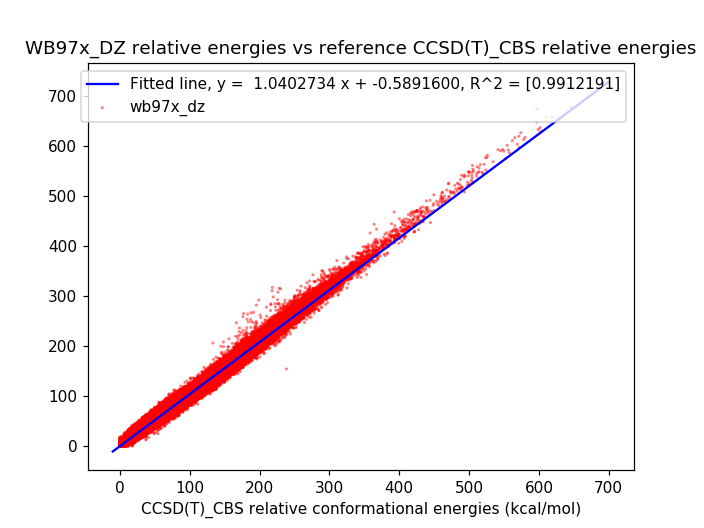

In [205]:
index_range = range(489193)
X = ccsdt_cbs_all_energies[index_range]
Y = wb97x_dz_all_energies[index_range]
A = np.vstack([X, np.ones(len(X))]).T
model, resid = np.linalg.lstsq(A, Y, rcond=None)[:2]
m, c = model
r2 = 1 - resid / (Y.size * Y.var())
rmse = np.linalg.norm(m*X + c - Y) / np.sqrt(len(Y))
print('RMSE =', rmse)
x2 = np.linspace(start = -10., stop = 700.0, num = 711)

plt.figure(25)
plt.clf()
plt.scatter(X, Y, c='red', edgecolors='none', s=4, alpha=0.5, label=('wb97x_dz'))
plt.plot(x2, m*x2 + c, c='blue', label=('Fitted line, y = %10.7f x + %10.7f, R^2 = %s' % (m, c, r2)))
plt.title("WB97x_DZ relative energies vs reference CCSD(T)_CBS relative energies")
plt.xlabel("CCSD(T)_CBS relative conformational energies (kcal/mol)")
# plt.ylabel("y-label")
plt.legend()
plt.show()


RMSE = 15.525177191129865


<IPython.core.display.Javascript object>


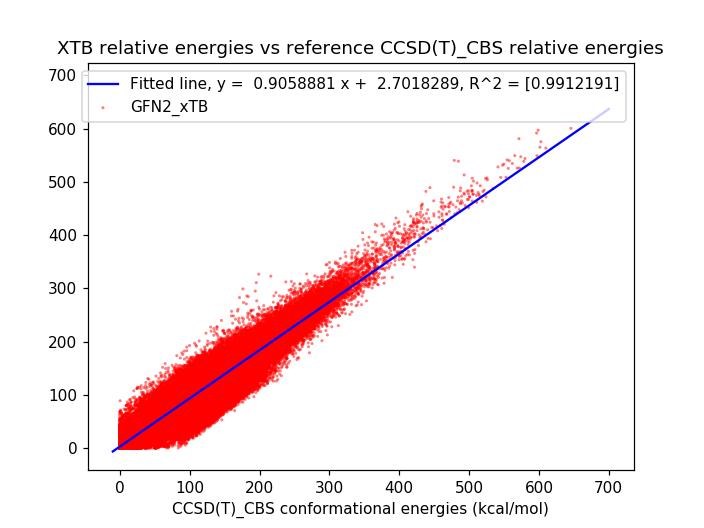

In [206]:
index_range = range(489193)
X = ccsdt_cbs_all_energies[index_range]
Y = xtb_all_energies[index_range]
A = np.vstack([X, np.ones(len(X))]).T
model1, resid1 = np.linalg.lstsq(A, Y, rcond=None)[:2]
m, c = model1
r1 = 1 - resid1 / (Y.size * Y.var())
rmse = np.linalg.norm(m*X + c - Y) / np.sqrt(len(Y))
print('RMSE =', rmse)
x1 = np.linspace(start = -10., stop = 700.0, num = 161)

plt.figure(26)
plt.scatter(X, Y, c='red', edgecolors='none', s=4, alpha=0.5, label=('GFN2_xTB'))
plt.plot(x1, m*x1 + c, c='blue', label=('Fitted line, y = %10.7f x + %10.7f, R^2 = %s' % (m, c, r2)))
plt.title("XTB relative energies vs reference CCSD(T)_CBS relative energies")
plt.xlabel("CCSD(T)_CBS conformational energies (kcal/mol)")
# plt.ylabel("y-label")
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


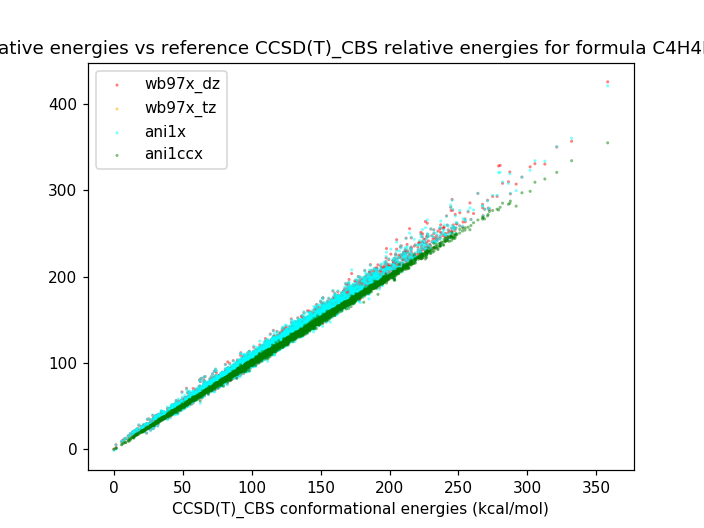

In [208]:
index_range = range(217407, 217407+5033-1)
plt.figure(24)
plt.scatter(ccsdt_cbs_all_energies[index_range], wb97x_dz_all_energies[index_range], c='red', edgecolors='none', s=4, alpha=0.5, label=('wb97x_dz'))
plt.scatter(ccsdt_cbs_all_energies[index_range], wb97x_tz_all_energies[index_range], c='orange', edgecolors='none', s=4, alpha=0.5, label=('wb97x_tz'))
plt.scatter(ccsdt_cbs_all_energies[index_range], ani1x_all_energies[index_range], c='cyan', edgecolors='none', s=4, alpha=0.5, label=('ani1x'))
plt.scatter(ccsdt_cbs_all_energies[index_range], ani1ccx_all_energies[index_range], c='green', edgecolors='none', s=4, alpha=0.5, label=('ani1ccx'))
# plt.scatter(ccsdt_cbs_all_energies[index_range], xtb_all_energies[index_range], c='blue', edgecolors='none', s=4, alpha=0.5, label=('xtb'))
plt.title("Relative energies vs reference CCSD(T)_CBS relative energies for formula C4H4N2O2")
plt.xlabel("CCSD(T)_CBS conformational energies (kcal/mol)")
# plt.ylabel("y-label")
plt.legend()
plt.show()


<IPython.core.display.Javascript object>


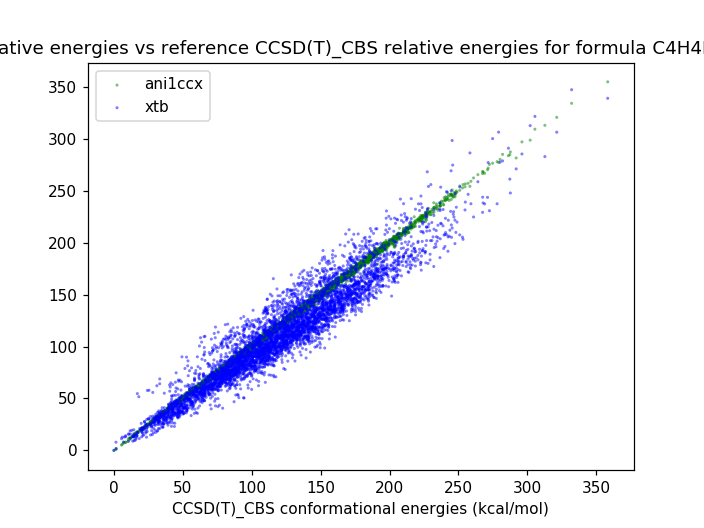

In [209]:
index_range = range(217407, 217407+5033-1)
plt.figure(241)
plt.scatter(ccsdt_cbs_all_energies[index_range], ani1ccx_all_energies[index_range], c='green', edgecolors='none', s=4, alpha=0.5, label=('ani1ccx'))
plt.scatter(ccsdt_cbs_all_energies[index_range], xtb_all_energies[index_range], c='blue', edgecolors='none', s=4, alpha=0.5, label=('xtb'))
plt.title("Relative energies vs reference CCSD(T)_CBS relative energies for formula C4H4N2O2")
plt.xlabel("CCSD(T)_CBS conformational energies (kcal/mol)")
# plt.ylabel("y-label")
plt.legend()
plt.show()


In [ ]:
%matplotlib notebook
import os
import numpy as np
import torchani
from torchani.data._pyanitools import anidataloader
from torchani.data._pyanitools import datapacker
import matplotlib.pyplot as plt

wb97x_dz_ref_eng = {"1": -0.4993212, "6": -37.8338334, "7": -54.5732825, "8": -75.0424519, 
                 "9": -99.6949007, "16": -398.0814169, "17": -460.1167006}
xtb_ref_eng = {"1": -0.39348276, "6": -1.79329637, "7": -2.60582416, "8": -3.76760695, 
               "9": -4.61933996, "16": -3.14645687, "17": -4.48252514}
wb97x_tz_ref_eng = {"1": -0.5013925, "6": -37.8459781, "7": -54.5915914, "8": -75.0768759, 
                 "9": -99.7471707, "16": -398.1079973, "17": -460.1467777}
ccsdt_ref_eng = {"1": -0.499945551382, "6": -37.789939698635, "7": -54.530780613581, "8": -75.005247682689, 
               "9": -99.668156212158, "16": -397.675555771164, "17": -4.48252514}

db = anidataloader('./ani1x-ccsdt_wb97x_dz_tz_xtb_ani.h5')
for i, data in enumerate(db):
    species = data['species']
    n_atom = len(data['species'])
    wb97x_dz_energies = data['wb97x_dz_energy']
    wb97x_tz_energies = data['wb97x_tz_energy']
    ccsdt_cbs_energies = data['ccsdt_cbs_energy']
    xtb_data_energies = data['xtb_energy']
    ani1x_energies = data['ani1x_energy'][:,8]
    ani1ccx_energies = data['ani1ccx_energy'][:,8]
    wb97x_dz_ref_data = 0.0
    wb97x_tz_ref_data = 0.0
    ccsdt_cbs_ref_data = 0.0
    xtb_ref_data = 0.0
    
    # for at in species:
    #     wb97x_dz_ref_data += wb97x_dz_ref_eng.get(str(at), 0.0)
    #     wb97x_tz_ref_data += wb97x_dz_ref_eng.get(str(at), 0.0)
    #     ccsdt_cbs_ref_data += ccsdt_ref_eng.get(str(at), 0.0)
    #     xtb_ref_data += xtb_ref_eng.get(str(at), 0.0)
    if wb97x_data_energies.size > 0:
        wb97x_dz_ref_data  = np.amin(wb97x_dz_energies)
        wb97x_tz_ref_data = np.amin(wb97x_tz_energies)
        ccsdt_cbs_ref_data = np.amin(ccsdt_cbs_energies)
        xtb_ref_data = np.amin(xtb_data_energies)

    wb97x_dz_energies = (wb97x_dz_energies - wb97x_dz_ref_data) * 627.509 # / float(n_atom)
    wb97x_tz_energies = (wb97x_tz_energies - wb97x_tz_ref_data) * 627.509 # / float(n_atom)
    ccsdt_cbs_energies = (ccsdt_cbs_energies - ccsdt_cbs_ref_data) * 627.509 # / float(n_atom)
    xtb_data_energies = (xtb_data_energies - xtb_ref_data) * 627.509 # / float(n_atom)
    ani1x_energies = (ani1x_energies - wb97x_dz_ref_data) * 627.509 # / float(n_atom)
    ani1ccx_energies = (ani1ccx_energies - ccsdt_cbs_ref_data) * 627.509 # / float(n_atom)
    # index_list = np.argwhere(abs(wb97x_data_energies) < 1000.0).reshape(-1)
    # wb97x_data_energies = wb97x_data_energies[index_list]
    # xtb_data_energies = xtb_data_energies[index_list]
    if i == 0:
        wb97x_dz_all_energies = wb97x_dz_energies
        wb97x_tz_all_energies = wb97x_tz_energies
        ccsdt_cbs_all_energies = ccsdt_cbs_energies
        ani1x_all_energies = ani1x_energies
        ani1ccx_all_energies = ani1ccx_energies
        xtb_all_energies = xtb_data_energies
    else:
        wb97x_dz_all_energies = np.concatenate((wb97x_dz_all_energies, wb97x_dz_energies), axis=None)
        wb97x_tz_all_energies = np.concatenate((wb97x_tz_all_energies, wb97x_tz_energies), axis=None)
        ccsdt_cbs_all_energies = np.concatenate((ccsdt_cbs_all_energies, ccsdt_cbs_energies), axis=None)
        ani1x_all_energies = np.concatenate((ani1x_all_energies, ani1x_energies), axis=None)
        ani1ccx_all_energies = np.concatenate((ani1ccx_all_energies, ani1ccx_energies), axis=None)
        xtb_all_energies = np.concatenate((xtb_all_energies, xtb_data_energies), axis=None)

